<center>
    
![](https://drive.google.com/uc?export=view&id=1R6EAVE0Ysym-UNtZR-Ze_HcqQLDmH0bd)
<p>

<h1 style="font-size: 4rem; color: black;">&nbsp;</h1>

<center>
    <h1 style="font-size: 2rem; color: black;">College: Engineering and Information Technology</h1>
    <h1 style="font-size: 2rem; color: black;">Department: Information Technology</h1>
    <h1 style="font-size: 2rem; color: black;">Program: Data Analytics</h1>
    <h1 style="font-size: 5rem; color: black;">Programming for Data Analytics || course Project</h1>
    <h1 style="font-size: 3rem; color: black;">(DAT-302)</h1>
</center>

<h1 style="font-size: 3.5rem; color: black;">&nbsp;</h1>

<center>
    <h1 style="font-size: 20rem; color: black;">Project 1</h1>
    <h1 style="font-size: 2rem; color: black;">Prepared by:</h1>
    <h1 style="font-size: 2rem; color:#b74eba;">Haniyah Alzaben-202110616, Layan Ahmad-202110844</h1>
    <h1 style="font-size: 2rem; color:#b74eba;">Leena Alsalihi-202110613</h1>
    <h1 style="font-size: 2rem; color:#b74eba;">Supervised by:</h1>
    <h1 style="font-size: 2rem; color:#b74eba;">Dr. Salam Fraihat</h1>
</center>

<h1 style="font-size: 2.5rem; color: black;">&nbsp;</h1>

<center>
<h1 style="font-size: 2.5rem; color: black;">Academic Year 2023-2024 - Spring</h1>
</center>

## **Google drive connection**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Importing necessary libraries**

In [2]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
from IPython.display import HTML
import seaborn as sns
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import keras
import visualkeras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , MaxPooling2D, Flatten , Dropout,AveragePooling2D ,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import cv2
import os
import pathlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
# To Suppress any Unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Shows the Tensorflow and Keras Version
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.14.0
Keras Version: 2.14.0


# **Getting data:**

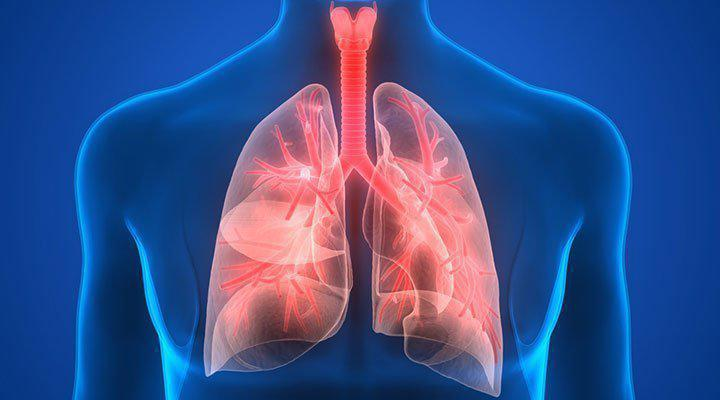

In [5]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Pneumonia_Chest_Xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_1998.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_1972.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_1941.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_214.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_2182.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_2056.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_2088.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_1943.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_215.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_2066.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_2014.jpeg
/content/drive/MyDrive/Pneumonia_Chest_Xray/train/PNEUMONIA/PNEUMONIA_2

In [6]:
# Function to remove images with the specified suffix from a directory
def remove_images_with_suffix(directory, suffix):
    for root, _, files in os.walk(directory):
        for file in files:
            if suffix in file:
                os.remove(os.path.join(root, file))

# Define labels and image size
labels = ['NORMAL', 'PNEUMONIA']
img_size = 150

# Define the directory where your dataset is located
dataset_dir = '/content/drive/MyDrive/Pneumonia_Chest_Xray'

# Suffix to remove
suffix_to_remove = '(1)'

# Remove images with the specified suffix
remove_images_with_suffix(os.path.join(dataset_dir, 'train'), suffix_to_remove)
remove_images_with_suffix(os.path.join(dataset_dir, 'test'), suffix_to_remove)
remove_images_with_suffix(os.path.join(dataset_dir, 'pred'), suffix_to_remove)

# Function to load the data
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Get the updated training data
train = get_data(os.path.join(dataset_dir, 'train'))
test = get_data(os.path.join(dataset_dir, 'test'))
pred= get_data(os.path.join(dataset_dir, 'pred'))

### Train Data

In [7]:
# Calculate the number of images for each class in the training data
class_counts = [sum(train[:, 1] == 0), sum(train[:, 1] == 1)]

# Create a DataFrame from the class counts
class_counts_df = pd.DataFrame({'Class Name': labels, 'Number of Images': class_counts})

# Create the bar chart using Plotly Express
fig = px.bar(
    class_counts_df,
    x='Class Name',
    y='Number of Images',
    color='Class Name',
    title='Class Distribution in the Training Set',
    labels={'Number of Images': 'Number of Images'},
    template='plotly_dark'
)

fig.update_traces(showlegend=False)
fig.update_xaxes(title='Class Name')
fig.update_yaxes(title='Number of Images')
fig.update_layout(width=500, height=400, font=dict(size=15, family='Franklin Gothic'))

fig.show()

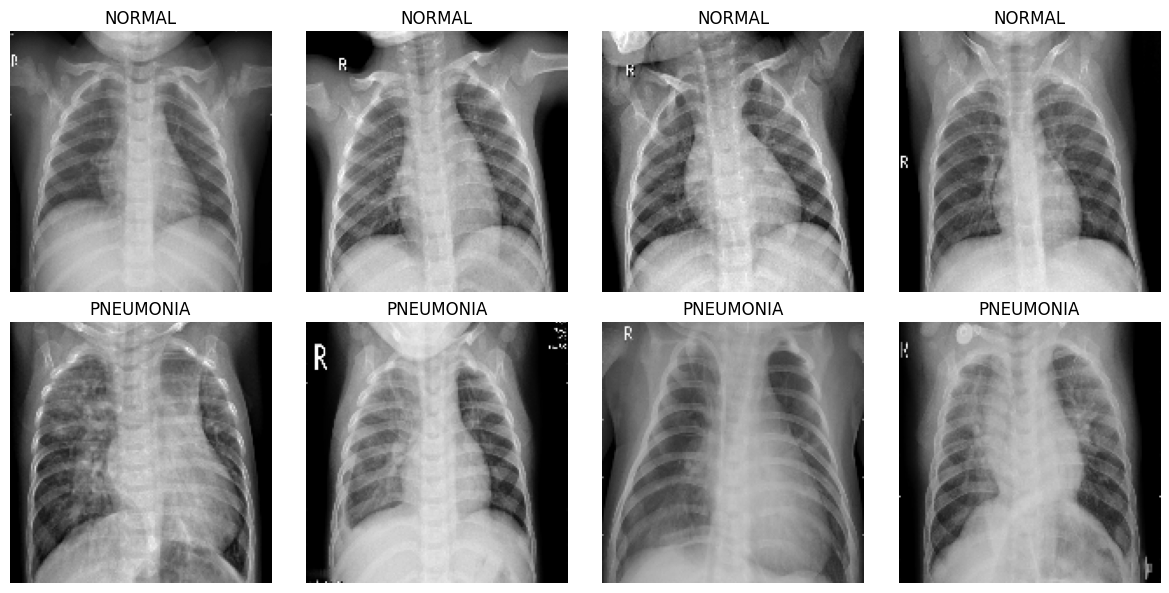

In [8]:
# Number of random images to display per class
num_images_to_display_per_class = 4

# Create a figure to display the random images
plt.figure(figsize=(12, 6))

for class_num, class_label in enumerate(labels):
    class_images = [(image, label) for image, label in train if label == class_num]
    random_sample = random.sample(class_images, num_images_to_display_per_class)

    for i, (image, label) in enumerate(random_sample):
        plt.subplot(len(labels), num_images_to_display_per_class, class_num * num_images_to_display_per_class + i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(class_label)
        plt.axis('off')

plt.tight_layout()
plt.show()

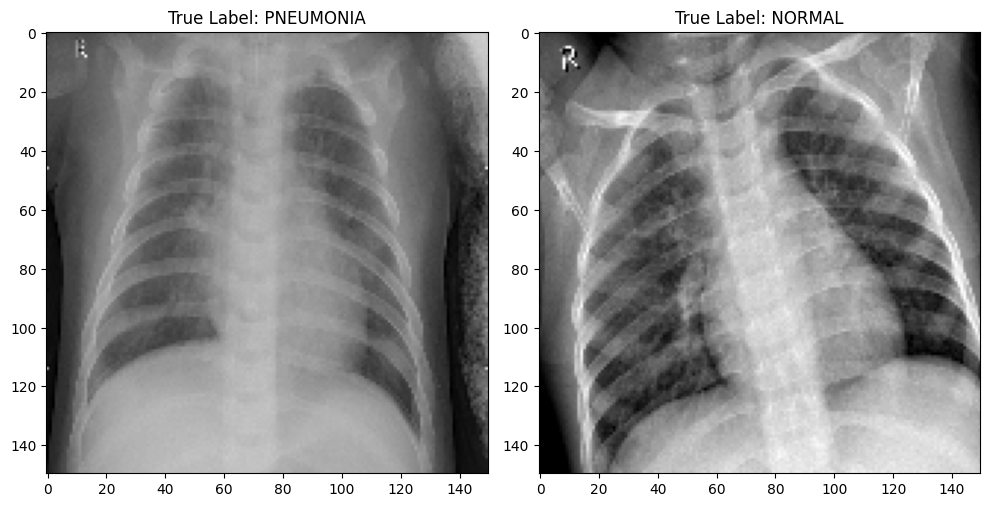

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Find an image with PNEUMONIA class
pneumonia_image = next(image for image in train if image[1] == 1)
axes[0].imshow(pneumonia_image[0], cmap='gray')
axes[0].set_title("True Label: PNEUMONIA")

# Find an image with NORMAL class
normal_image = next(image for image in train if image[1] == 0)
axes[1].imshow(normal_image[0], cmap='gray')
axes[1].set_title("True Label: NORMAL")

plt.tight_layout()
plt.show()


### Test Data

In [12]:
# Calculate the number of images for each class in the training data
class_counts = [sum(test[:, 1] == 0), sum(test[:, 1] == 1)]

# Create a DataFrame from the class counts
class_counts_df = pd.DataFrame({'Class Name': labels, 'Number of Images': class_counts})

# Create the bar chart using Plotly Express
fig = px.bar(
    class_counts_df,
    x='Class Name',
    y='Number of Images',
    color='Class Name',
    title='Class Distribution in the Testing Set',
    labels={'Number of Images': 'Number of Images'},
    template='plotly_dark'
)

fig.update_traces(showlegend=False)
fig.update_xaxes(title='Class Name')
fig.update_yaxes(title='Number of Images')
fig.update_layout(width=500, height=400, font=dict(size=15, family='Franklin Gothic'))

fig.show()

### Pred Data

In [13]:
# Calculate the number of images for each class in the training data
class_counts = [sum(pred[:, 1] == 0), sum(pred[:, 1] == 1)]

# Create a DataFrame from the class counts
class_counts_df = pd.DataFrame({'Class Name': labels, 'Number of Images': class_counts})

# Create the bar chart using Plotly Express
fig = px.bar(
    class_counts_df,
    x='Class Name',
    y='Number of Images',
    color='Class Name',
    title='Class Distribution in the Predicting Set',
    labels={'Number of Images': 'Number of Images'},
    template='plotly_dark'
)

fig.update_traces(showlegend=False)
fig.update_xaxes(title='Class Name')
fig.update_yaxes(title='Number of Images')
fig.update_layout(width=500, height=400, font=dict(size=15, family='Franklin Gothic'))

fig.show()

#**Preprocessing:**

---

The success of any machine learning model relies significantly on the quality and consistency of the input data. In the context of our project, the preprocessing steps were carefully designed to ensure the dataset's integrity, enhance model generalization, and facilitate efficient training.

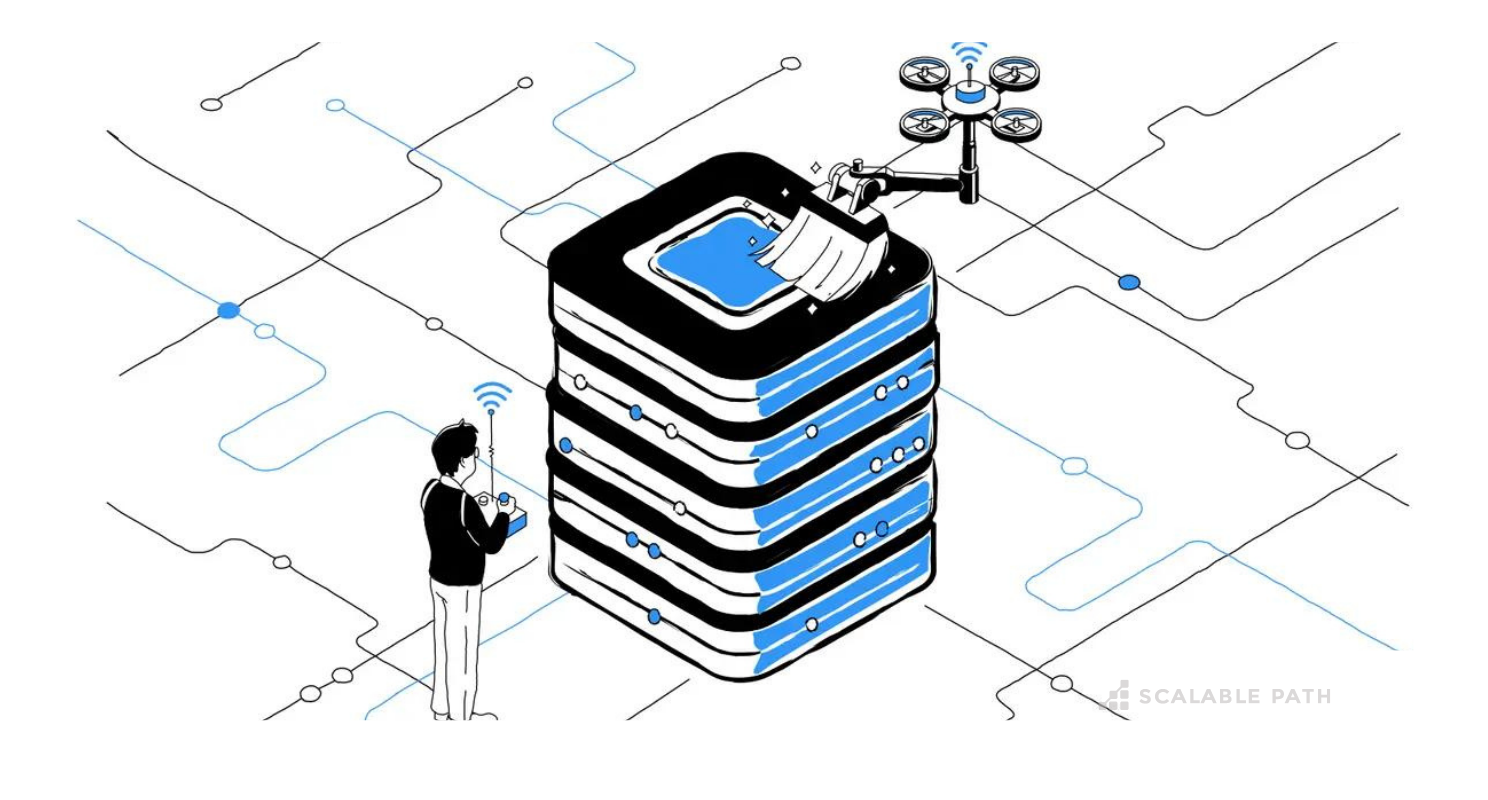

In [14]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train, shuffle=True)

# Check the class distribution in the validation set
unique, counts = np.unique(y_val, return_counts=True)
print(dict(zip(unique, counts)))

# Normalize and reshape the data for deep learning
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255

x_train = x_train.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)
x_val = x_val.reshape(-1, img_size, img_size, 1)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

{0: 686, 1: 777}


In [15]:
# Count the number of images in each dataset
print('Found ',len(x_train), 'images belonging to 2 classes in Training.')
print('Found ',len(x_val), 'images belonging to 2 classes in Validation.')
print('Found ',len(x_test), 'images belonging to 2 classes in Testing.')

Found  5852 images belonging to 2 classes in Training.
Found  1463 images belonging to 2 classes in Validation.
Found  620 images belonging to 2 classes in Testing.


In [16]:

# Count the number of images in each dataset
train_count = len(x_train)
test_count = len(x_test)
val_count = len(x_val)

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Dataset': ['Training', 'Validation', 'Testing'],
    'Count': [train_count, val_count, test_count]
})

# Create an interactive bar plot
fig = px.bar(data, x='Dataset', y='Count', text='Count', title='Train, Validation, Test Split')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title='Dataset',
    yaxis_title='Num of images',
    width=800,
    height=500
)
fig.show()

In [17]:
# Count the number of "NORMAL" and "PNEUMONIA" images in each dataset
def count_images_by_class(dataset):
    normal_count = sum(1 for label in dataset if label == 0)  # Assuming 0 represents "NORMAL"
    pneumonia_count = sum(1 for label in dataset if label == 1)  # Assuming 1 represents "PNEUMONIA"
    return normal_count, pneumonia_count

train_normal, train_pneumonia = count_images_by_class(y_train)
test_normal, test_pneumonia = count_images_by_class(y_test)
val_normal, val_pneumonia = count_images_by_class(y_val)

# Create a DataFrame to hold the data
import pandas as pd
data = pd.DataFrame({
    'Dataset': ['Training', 'Validation', 'Test'],
    'Normal': [train_normal, val_normal, test_normal],
    'Pneumonia': [train_pneumonia, val_pneumonia, test_pneumonia]
})

# Create a grouped interactive bar chart
fig = px.bar(data, x='Dataset', y=['Normal', 'Pneumonia'], title='Number of Images by Class in Datasets')
fig.update_layout(barmode='group')
fig.update_layout(
    xaxis_title='Dataset',
    yaxis_title='Number of images',
    width=800,  # Set the width of the figure
    height=500   # Set the height of the figure
)
fig.show()

##**Data Augmentaton**:


---
Data augmentation is a technique used in machine learning to artificially increase the diversity of a training dataset by applying various transformations to the existing data. These transformations include rotations, flips, zooms, and other modifications that do not change the fundamental characteristics of the data.


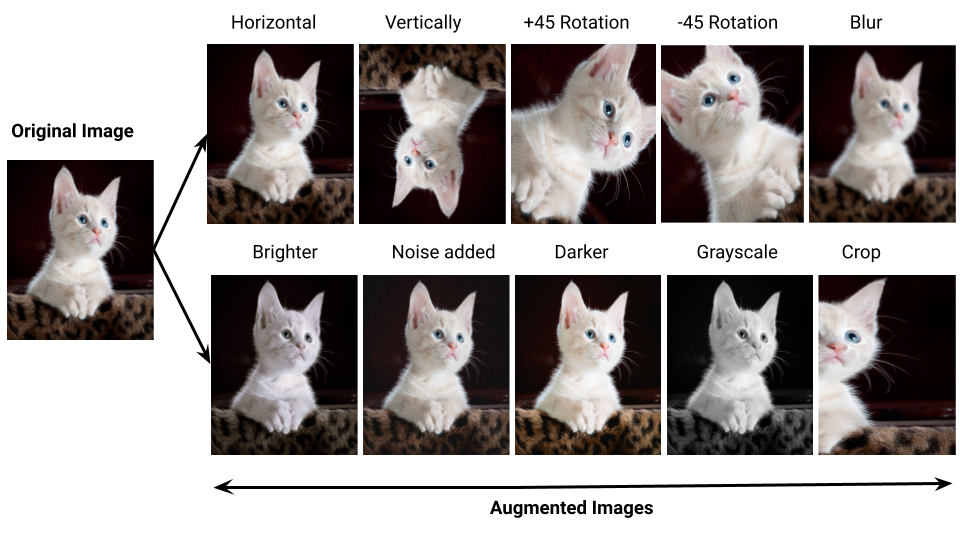

In [18]:
train_datagen = ImageDataGenerator(rotation_range=10, # Rotate images by up to 10 degrees
                             width_shift_range=0.1,  # Shift width by up to 10% of the image width
                             height_shift_range=0.1,  # Shift height by up to 10% of the image height
                             shear_range=0.2,  # Apply shear transformation
                             zoom_range=[0.8, 1.2],  # Random zoom in/out
                             horizontal_flip=True,  # Random horizontal flip
                             fill_mode='nearest')

test_datagen = ImageDataGenerator()

train_datagen.fit(x_train)  # Make sure you've already loaded your x_train
train_datagen.fit(x_val)

batch_size=32

# Example of using datagen to generate augmented training data
train_gen = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_gen = train_datagen.flow(x_val, y_val, batch_size=batch_size)
test_gen = test_datagen.flow(x_test, y_test, batch_size=batch_size)

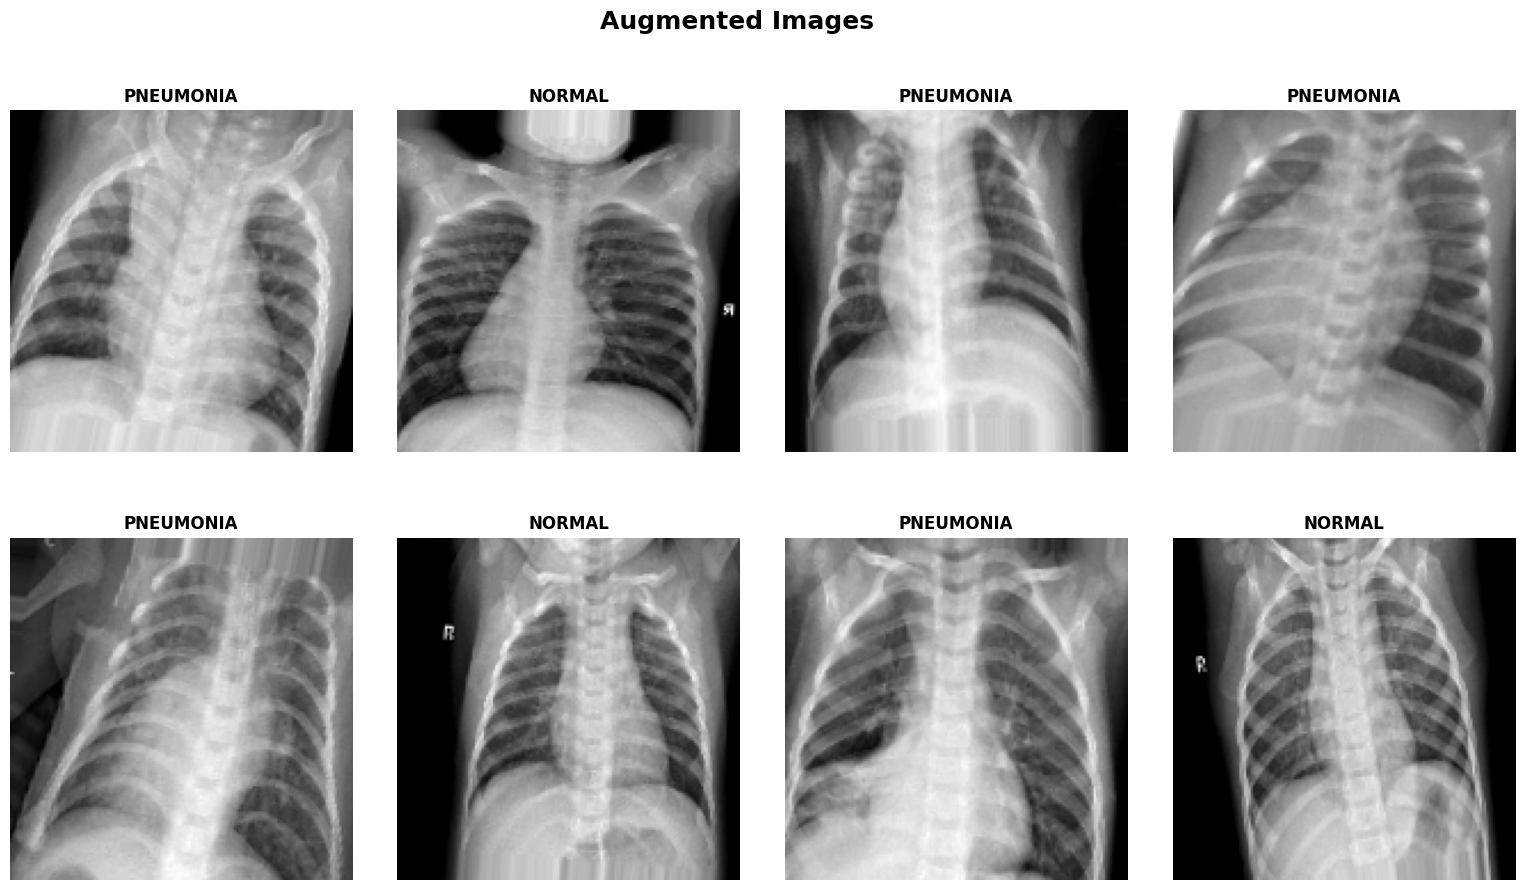

In [19]:
# Define the number of images you want to display
num_images_to_display = 8

# Load a batch of augmented images
images, labels = next(train_gen)

# Create a grid for displaying the images
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Augmented Images', weight='bold', fontsize=18)
plt.subplots_adjust(wspace=0, hspace=0.25)

c = 0

# Display the augmented images
for i in range(2):
    for j in range(4):
        if c < num_images_to_display:
            img = images[c]
            label = "PNEUMONIA" if labels[c] == 1 else "NORMAL"
            axs[i, j].imshow(img[:, :, 0], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(label, weight='bold')
            c += 1

# Display the plot
plt.show()

In [20]:
# Define the dataset names and counts
labels = ['Train', 'Validation', 'Test']
sizes = [train_count, val_count, test_count]

# Create a DataFrame for the pie chart
data = pd.DataFrame({'Dataset': labels, 'Count': sizes})

# Create an interactive pie chart with custom figure size
fig = px.pie(data, values='Count', names='Dataset', title='Distribution of Images')

# Set a custom figure size
fig.update_layout(
    width=600,  # Set the width of the figure
    height=400   # Set the height of the figure
)

fig.show()

In [21]:
# Define the counts of dataset splits
training_count = len(x_train)
validation_count = len(x_val)

# Create a DataFrame with the dataset splits
data = {
    "Split": ["Training", "Validation"],
    "Count": [training_count, validation_count]
}

dataset_splits_df = pd.DataFrame(data)

# Create a pie chart using Plotly Express
fig = px.pie(
    dataset_splits_df,
    values="Count",
    names="Split",
    title="Dataset Split Distribution",
    width=800,
    height=500
)

# Show the plot
fig.show()

In [22]:
# Define custom class names
class_names = ['NORMAL', 'PNEUMONIA']  # Replace with your custom class names

# Create a DataFrame with class labels
df = pd.DataFrame({'Class Name': y_train, 'Number of Images': 1})

# Map the custom class names to the class labels
df['Class Name'] = df['Class Name'].map({0: class_names[0], 1: class_names[1]})

# Group and count the number of images for each class
class_counts_df = df.groupby('Class Name').count().reset_index()

# Define custom colors for each bar
colors = ['blue', 'red']  # Replace with your desired colors

# Create the bar chart using Plotly Express with custom colors
fig = px.bar(
    class_counts_df,
    x="Class Name",
    y="Number of Images",
    title="Class Distribution in the Train Split",
    labels={"Number of Images": "Number of Images"},
    color=colors
)

# Customize the layout as needed
fig.update_traces(showlegend=False)
fig.update_xaxes(title="Class Name")
fig.update_yaxes(title="Number of Images")
fig.update_layout(width=700, height=500, font=dict(size=15, family="Franklin Gothic"))

# Show the plot
fig.show()

In [23]:
class_namess = ['NORMAL', 'PNEUMONIA']  # Replace with your custom class names

# Create a DataFrame with class labels
dff = pd.DataFrame({'Class Name': y_val, 'Number of Images': 1})

# Map the custom class names to the class labels
dff['Class Name'] = dff['Class Name'].map({0: class_namess[0], 1: class_namess[1]})

# Group and count the number of images for each class
class_counts_dff = dff.groupby('Class Name').count().reset_index()

# Define custom colors for each bar
colorss = ['blue', 'red']  # Replace with your desired colors

# Create the bar chart using Plotly Express with custom colors
figg = px.bar(
    class_counts_dff,
    x="Class Name",
    y="Number of Images",
    title="Class Distribution in the Validation Split",
    labels={"Number of Images": "Number of Images"},
    color=colorss
)

# Customize the layout as needed
figg.update_traces(showlegend=False)
figg.update_xaxes(title="Class Name")
figg.update_yaxes(title="Number of Images")
figg.update_layout(width=700, height=500, font=dict(size=15, family="Franklin Gothic"))

# Show the plot
figg.show()

In [24]:
# Generate a batch of images from the 'train_generator'
images, labels = next(train_gen)
imagess, labelss = next(test_gen)
# Get the shape of the first image in the batch
image_shape_train = images[1].shape
image_shape_test = images[1].shape
# Print the shape of the specific image
print("Image shape in Train:", image_shape_train)
print("Image shape in Test:", image_shape_test)

Image shape in Train: (150, 150, 1)
Image shape in Test: (150, 150, 1)


In [25]:
for image_batch, label_batch in train_gen:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 150, 150, 1)
(32,)


In [26]:
for image_batch, label_batch in train_gen:
    print(label_batch)
    print(image_batch[0])
    break

[0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1]
[[[0.11761197]
  [0.08262753]
  [0.07745169]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.12129613]
  [0.08841693]
  [0.07587276]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.12498029]
  [0.09420633]
  [0.07429384]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.3894019 ]
  [0.4232249 ]
  [0.520733  ]
  ...
  [0.59322375]
  [0.43269876]
  [0.2853062 ]]

 [[0.38319442]
  [0.41796184]
  [0.50547004]
  ...
  [0.6011184 ]
  [0.4595405 ]
  [0.30688483]]

 [[0.3495107 ]
  [0.41269875]
  [0.4902071 ]
  ...
  [0.609013  ]
  [0.48638222]
  [0.3284635 ]]]


In [27]:
for image_batch, label_batch in test_gen:
    print(label_batch)
    print(image_batch[0])
    break

[0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0]
[[[0.02352941]
  [0.02352941]
  [0.02352941]
  ...
  [0.02745098]
  [0.03137255]
  [0.        ]]

 [[0.02745098]
  [0.02352941]
  [0.02745098]
  ...
  [0.02352941]
  [0.03529412]
  [0.        ]]

 [[0.02352941]
  [0.02745098]
  [0.02745098]
  ...
  [0.02352941]
  [0.03529412]
  [0.        ]]

 ...

 [[0.        ]
  [0.        ]
  [0.03921569]
  ...
  [0.05882353]
  [0.05882353]
  [0.0627451 ]]

 [[0.        ]
  [0.        ]
  [0.04313726]
  ...
  [0.05882353]
  [0.05882353]
  [0.05882353]]

 [[0.        ]
  [0.        ]
  [0.04313726]
  ...
  [0.05882353]
  [0.0627451 ]
  [0.05882353]]]


# **Sensitivity Analysis:**

---

Sensitivity analysis is a technique used to study how the variation or uncertainty in the input parameters of a model affects the output or results of that model.

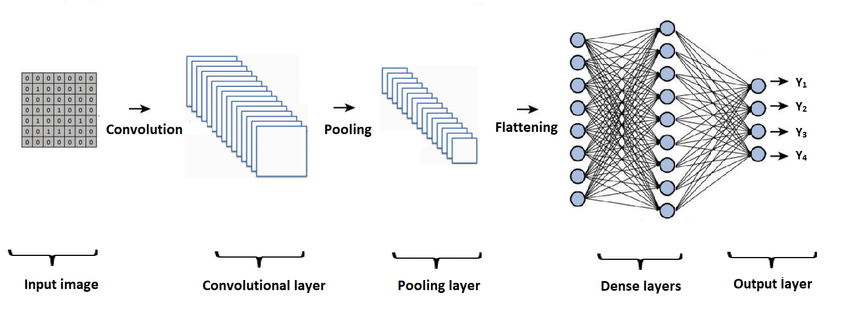

# 1. Number of Dense Layers

---
After the initial layers of Convolutional Neural Networks (CNNs), which include convolutional and pooling layers, the network has performed feature extraction. Convolutional layers detect hierarchical patterns and local features, while pooling layers down-sample spatial dimensions.

Dense layers are employed for the final stages of model training and classification. Dense layers connect every neuron in one layer to every neuron in the next layer, forming fully connected networks. These layers play a crucial role in leveraging the extracted features to make predictions.



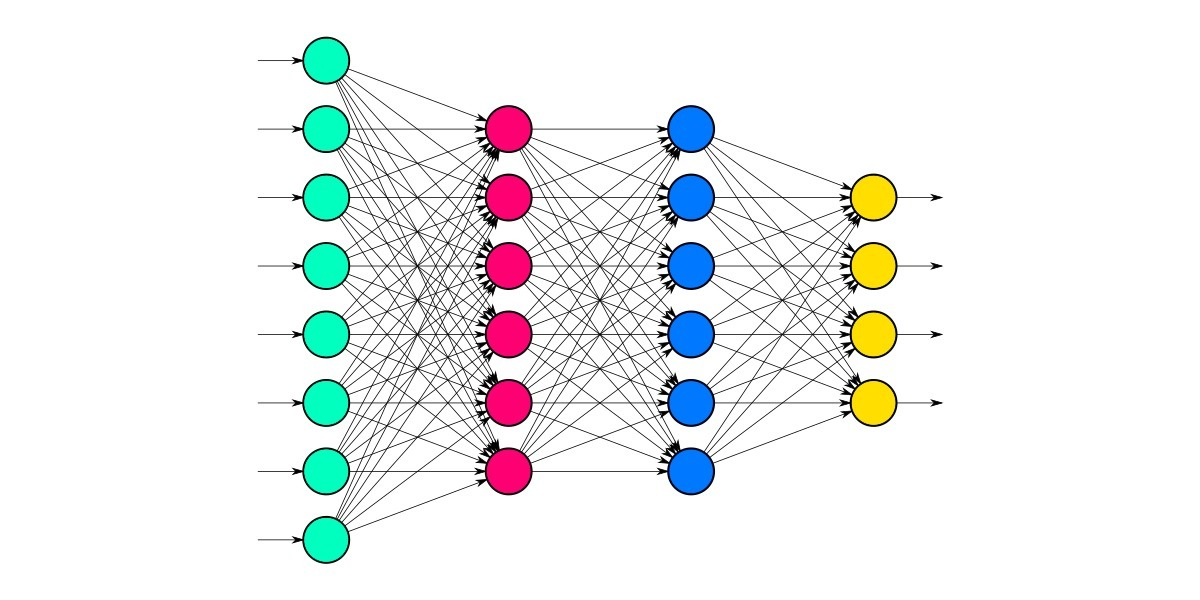

In [ ]:
def model1(num_dense_layers, neurons):
  # Define the CNN model
  cnn_model = Sequential()

  # Convolutional layers
  cnn_model.add(Conv2D(16, 3, padding="same", activation="relu", input_shape=(150, 150, 1)))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Conv2D(32, 3, padding="same", activation="relu"))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Conv2D(64, 3, padding="same", activation="relu"))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Conv2D(128, 3, padding="same", activation="relu"))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Dropout(0.2))
  cnn_model.add(Flatten())

  for i in range(num_dense_layers):
     cnn_model.add(keras.layers.Dense(neurons[i], activation='relu'))

  cnn_model.add(keras.layers.Dense(1, activation='sigmoid'))

  cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

  return cnn_model

## 1 Dense Layer with 128 neurons

In [ ]:
num_dense_layers = 1
neurons = [128]
dense128 = model1(num_dense_layers, neurons)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=dense128.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 147s 794ms/step - loss: 0.4293 - accuracy: 0.8035 - val_loss: 0.3129 - val_accuracy: 0.8660
Epoch 2/100
183/183 [==============================] - 155s 845ms/step - loss: 0.2847 - accuracy: 0.8829 - val_loss: 0.2307 - val_accuracy: 0.9070
Epoch 3/100
183/183 [==============================] - 157s 861ms/step - loss: 0.2621 - accuracy: 0.8958 - val_loss: 0.2091 - val_accuracy: 0.9105
Epoch 4/100
183/183 [==============================] - 145s 790ms/step - loss: 0.2302 - accuracy: 0.9118 - val_loss: 0.2019 - val_accuracy: 0.9180
Epoch 5/100
183/183 [==============================] - 151s 824ms/step - loss: 0.2175 - accuracy: 0.9173 - val_loss: 0.1880 - val_accuracy: 0.9337
Epoch 6/100
183/183 [==============================] - 153s 837ms/step - loss: 0.2111 - accuracy: 0.9200 - val_loss: 0.2121 - val_accuracy: 0.9173
Epoch 7/100
183/183 [==============================] - 144s 786ms/step - loss: 0.2113 - accuracy: 0.9205 - val_loss: 0

In [ ]:
test_results128 = dense128.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results128[0])
print("Test Accuracy:", test_results128[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results128[1]*100,2)))

20/20 [==============================] - 4s 220ms/step - loss: 0.1461 - accuracy: 0.9419
Test Loss: 0.14612562954425812
Test Accuracy: 0.9419354796409607
The current model achieved a categorical accuracy of 94.19%


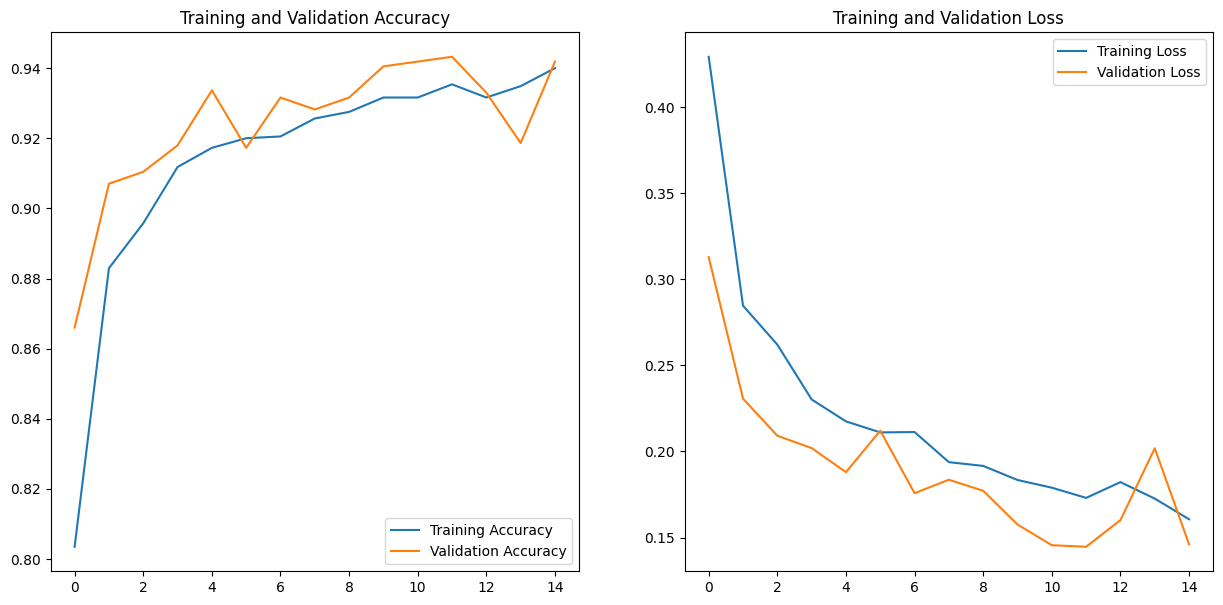

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20/20 [==============================] - 3s 151ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.93      0.92      0.92       234
Pneumonia (Class 1)       0.95      0.96      0.95       386

           accuracy                           0.94       620
          macro avg       0.94      0.94      0.94       620
       weighted avg       0.94      0.94      0.94       620



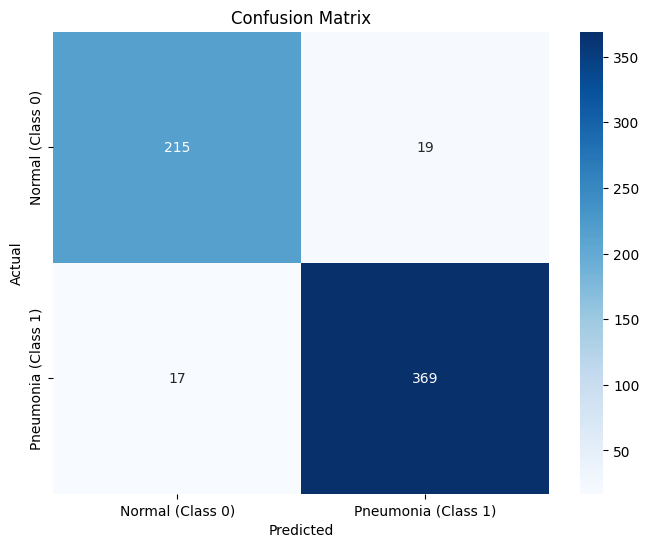

In [ ]:
test_predictions = dense128.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 1 Dense Layer with 256 neurons

In [ ]:
num_dense_layers = 1
neurons = [256]
dense256 = model1(num_dense_layers, neurons)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=dense256.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 165s 887ms/step - loss: 0.4560 - accuracy: 0.7828 - val_loss: 0.2921 - val_accuracy: 0.8879
Epoch 2/100
183/183 [==============================] - 147s 805ms/step - loss: 0.3310 - accuracy: 0.8633 - val_loss: 0.2956 - val_accuracy: 0.8722
Epoch 3/100
183/183 [==============================] - 150s 819ms/step - loss: 0.2526 - accuracy: 0.9000 - val_loss: 0.2116 - val_accuracy: 0.9105
Epoch 4/100
183/183 [==============================] - 160s 876ms/step - loss: 0.2310 - accuracy: 0.9086 - val_loss: 0.2277 - val_accuracy: 0.9057
Epoch 5/100
183/183 [==============================] - 159s 871ms/step - loss: 0.2258 - accuracy: 0.9156 - val_loss: 0.1866 - val_accuracy: 0.9310
Epoch 6/100
183/183 [==============================] - 148s 808ms/step - loss: 0.2031 - accuracy: 0.9238 - val_loss: 0.1847 - val_accuracy: 0.9248
Epoch 7/100
183/183 [==============================] - 147s 805ms/step - loss: 0.2068 - accuracy: 0.9204 - val_loss: 0

In [ ]:
test_results256 = dense256.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results256[0])
print("Test Accuracy:", test_results256[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results256[1]*100,2)))

20/20 [==============================] - 5s 227ms/step - loss: 0.1298 - accuracy: 0.9532
Test Loss: 0.1297706663608551
Test Accuracy: 0.9532257914543152
The current model achieved a categorical accuracy of 95.32%


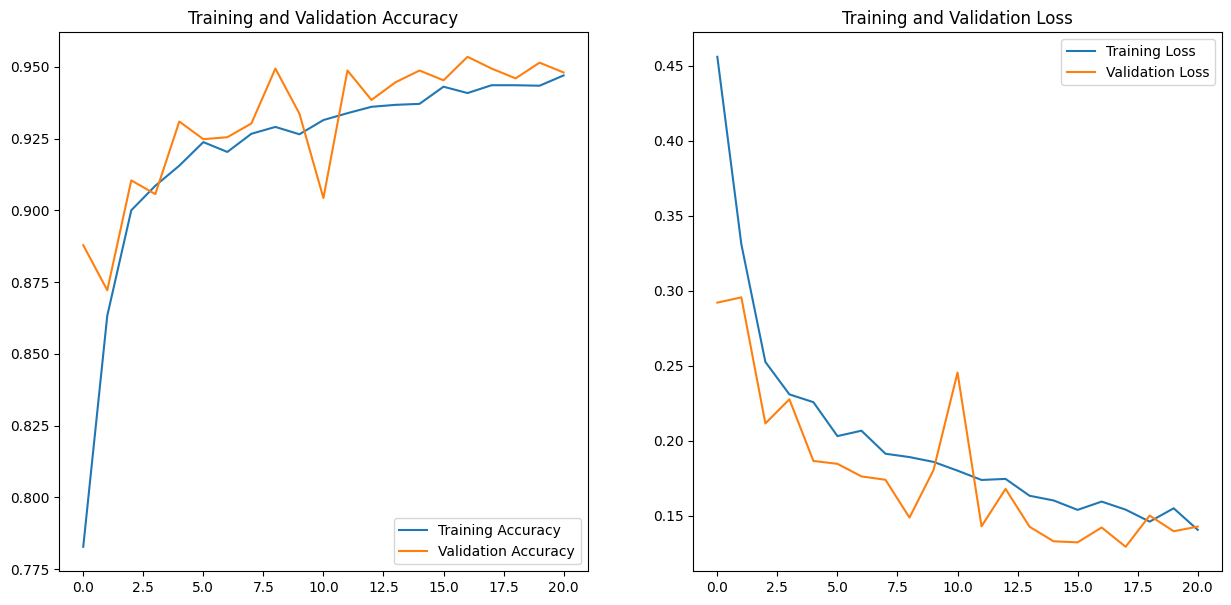

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20/20 [==============================] - 3s 155ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.97      0.91      0.94       234
Pneumonia (Class 1)       0.95      0.98      0.96       386

           accuracy                           0.95       620
          macro avg       0.96      0.94      0.95       620
       weighted avg       0.95      0.95      0.95       620



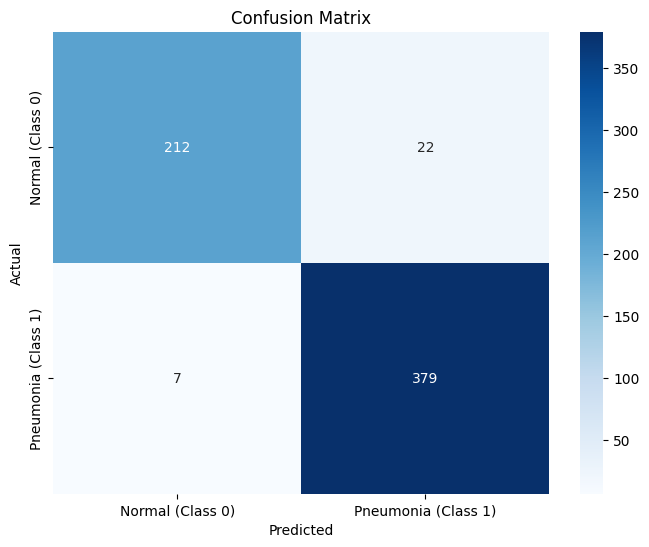

In [ ]:
test_predictions = dense256.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2 Dense Layers

In [ ]:
num_dense_layers = 2
neurons = [128, 256]
dense2 = model1(num_dense_layers, neurons)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=dense2.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 176s 954ms/step - loss: 0.4965 - accuracy: 0.7350 - val_loss: 0.5991 - val_accuracy: 0.7498
Epoch 2/100
183/183 [==============================] - 166s 905ms/step - loss: 0.3109 - accuracy: 0.8735 - val_loss: 0.3342 - val_accuracy: 0.8619
Epoch 3/100
183/183 [==============================] - 165s 899ms/step - loss: 0.2659 - accuracy: 0.8913 - val_loss: 0.2510 - val_accuracy: 0.9016
Epoch 4/100
183/183 [==============================] - 174s 953ms/step - loss: 0.2384 - accuracy: 0.9036 - val_loss: 0.1990 - val_accuracy: 0.9221
Epoch 5/100
183/183 [==============================] - 165s 901ms/step - loss: 0.2200 - accuracy: 0.9127 - val_loss: 0.2637 - val_accuracy: 0.8982
Epoch 6/100
183/183 [==============================] - 174s 946ms/step - loss: 0.2169 - accuracy: 0.9183 - val_loss: 0.2233 - val_accuracy: 0.9091
Epoch 7/100
183/183 [==============================] - 163s 891ms/step - loss: 0.2114 - accuracy: 0.9161 - val_loss: 0

In [ ]:
test_results2 = dense2.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results2[0])
print("Test Accuracy:", test_results2[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results2[1]*100,2)))

20/20 [==============================] - 4s 203ms/step - loss: 0.1635 - accuracy: 0.9339
Test Loss: 0.16352586448192596
Test Accuracy: 0.9338709712028503
The current model achieved a categorical accuracy of 93.39%


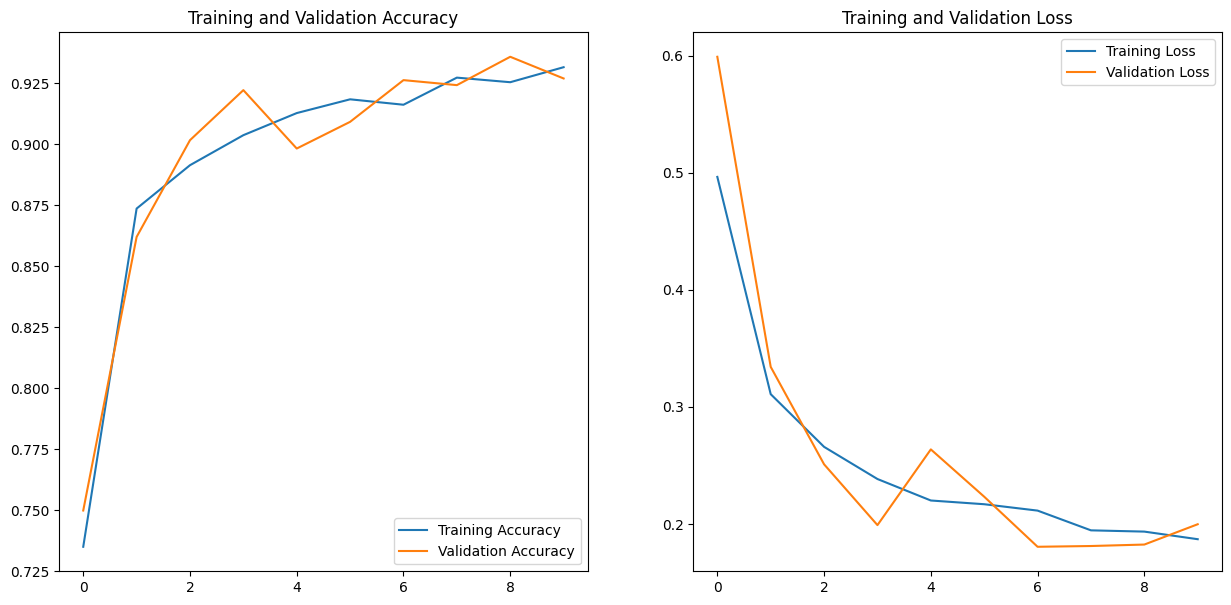

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20/20 [==============================] - 4s 177ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.91      0.92      0.91       234
Pneumonia (Class 1)       0.95      0.94      0.95       386

           accuracy                           0.93       620
          macro avg       0.93      0.93      0.93       620
       weighted avg       0.93      0.93      0.93       620



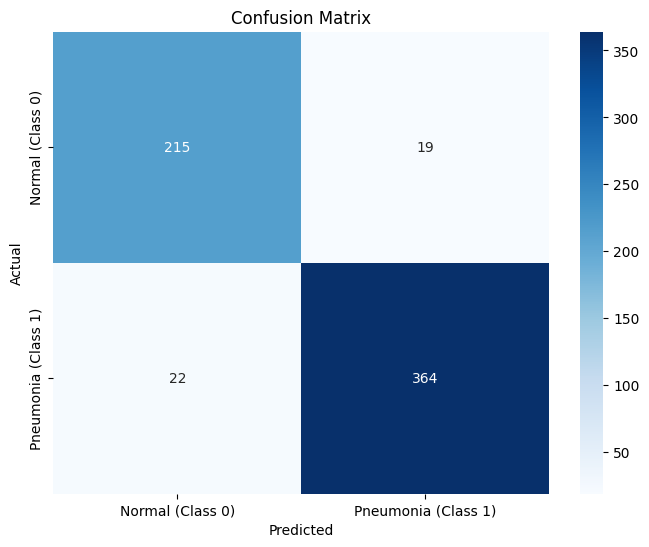

In [ ]:
test_predictions = dense2.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3 Dense Layers

In [ ]:
num_dense_layers = 3
neurons = [256 ,128, 64]
dense3 = model1(num_dense_layers, neurons)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=dense3.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 191s 1s/step - loss: 0.4575 - accuracy: 0.7748 - val_loss: 0.2786 - val_accuracy: 0.8913
Epoch 2/100
183/183 [==============================] - 181s 990ms/step - loss: 0.2859 - accuracy: 0.8865 - val_loss: 0.2319 - val_accuracy: 0.9098
Epoch 3/100
183/183 [==============================] - 187s 1s/step - loss: 0.2601 - accuracy: 0.8997 - val_loss: 0.2215 - val_accuracy: 0.9200
Epoch 4/100
183/183 [==============================] - 172s 941ms/step - loss: 0.2231 - accuracy: 0.9105 - val_loss: 0.1985 - val_accuracy: 0.9262
Epoch 5/100
183/183 [==============================] - 186s 1s/step - loss: 0.2104 - accuracy: 0.9197 - val_loss: 0.2431 - val_accuracy: 0.9077
Epoch 6/100
183/183 [==============================] - 188s 1s/step - loss: 0.2009 - accuracy: 0.9233 - val_loss: 0.1847 - val_accuracy: 0.9323
Epoch 7/100
183/183 [==============================] - 190s 1s/step - loss: 0.1867 - accuracy: 0.9296 - val_loss: 0.1967 - val_acc

In [ ]:
test_results3 = dense3.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results3[0])
print("Test Accuracy:", test_results3[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results3[1]*100,2)))

20/20 [==============================] - 4s 186ms/step - loss: 0.1183 - accuracy: 0.9597
Test Loss: 0.11826583743095398
Test Accuracy: 0.9596773982048035
The current model achieved a categorical accuracy of 95.97%


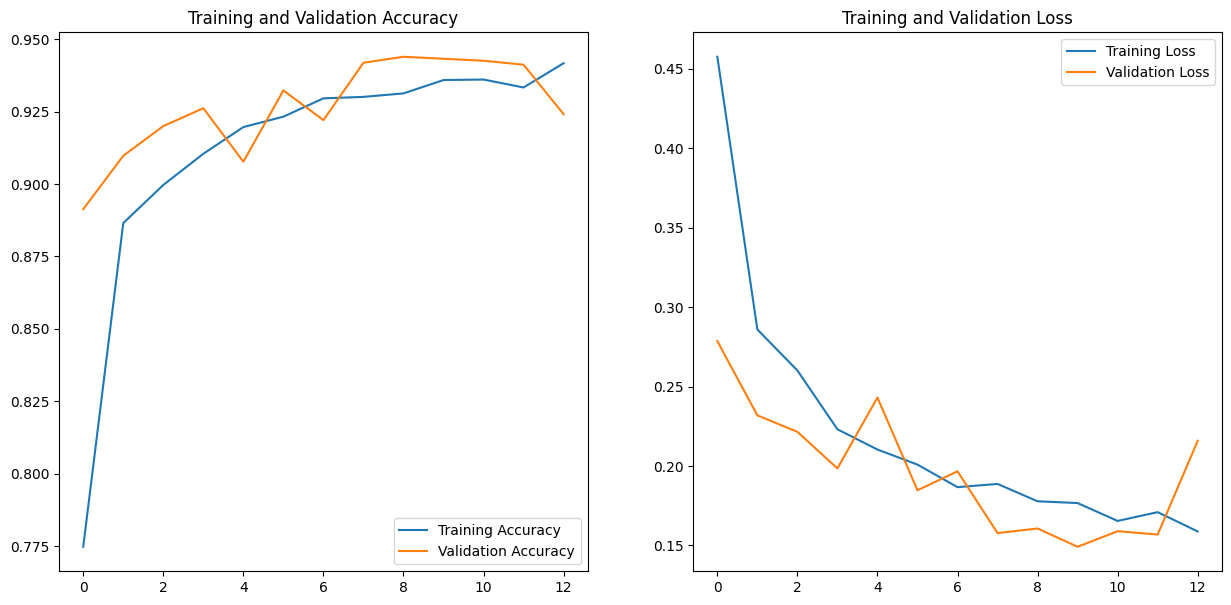

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20/20 [==============================] - 4s 179ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.95      0.94      0.95       234
Pneumonia (Class 1)       0.96      0.97      0.97       386

           accuracy                           0.96       620
          macro avg       0.96      0.96      0.96       620
       weighted avg       0.96      0.96      0.96       620



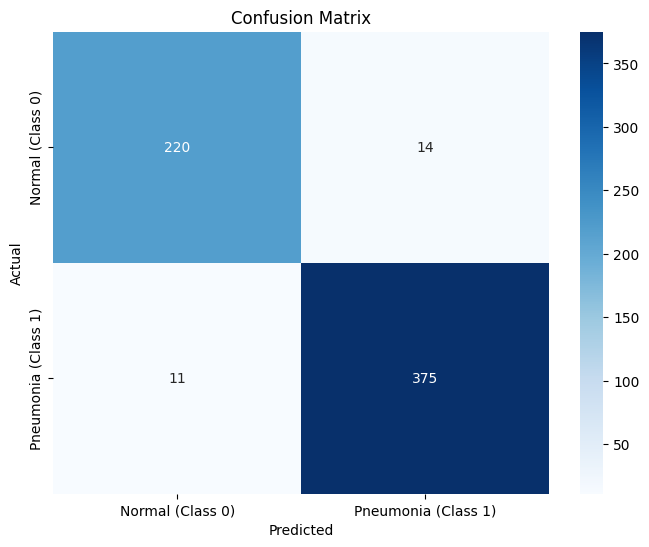

In [ ]:
test_predictions = dense3.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4 Dense Layers

In [ ]:
num_dense_layers = 4
neurons = [256 ,128,128, 64]
dense4 = model1(num_dense_layers, neurons)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=dense4.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 236s 1s/step - loss: 0.4916 - accuracy: 0.7546 - val_loss: 0.3970 - val_accuracy: 0.8230
Epoch 2/100
183/183 [==============================] - 181s 990ms/step - loss: 0.3216 - accuracy: 0.8698 - val_loss: 0.2637 - val_accuracy: 0.8995
Epoch 3/100
183/183 [==============================] - 179s 979ms/step - loss: 0.2870 - accuracy: 0.8845 - val_loss: 0.2567 - val_accuracy: 0.8893
Epoch 4/100
183/183 [==============================] - 178s 972ms/step - loss: 0.2548 - accuracy: 0.8973 - val_loss: 0.2273 - val_accuracy: 0.9023
Epoch 5/100
183/183 [==============================] - 193s 1s/step - loss: 0.2533 - accuracy: 0.8997 - val_loss: 0.1953 - val_accuracy: 0.9214
Epoch 6/100
183/183 [==============================] - 182s 994ms/step - loss: 0.2259 - accuracy: 0.9120 - val_loss: 0.1761 - val_accuracy: 0.9310
Epoch 7/100
183/183 [==============================] - 174s 948ms/step - loss: 0.2186 - accuracy: 0.9183 - val_loss: 0.2059 

In [ ]:
test_results4 = dense4.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results4[0])
print("Test Accuracy:", test_results4[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results4[1]*100,2)))

20/20 [==============================] - 4s 190ms/step - loss: 0.1437 - accuracy: 0.9484
Test Loss: 0.1436789333820343
Test Accuracy: 0.948387086391449
The current model achieved a categorical accuracy of 94.84%


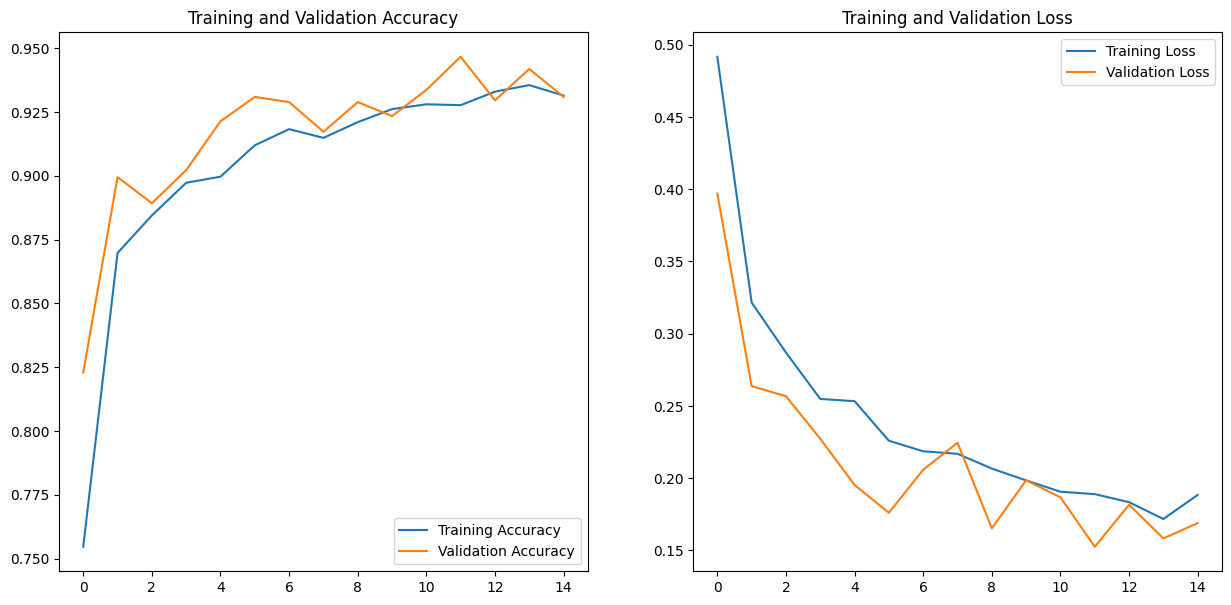

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20/20 [==============================] - 6s 273ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.94      0.93      0.93       234
Pneumonia (Class 1)       0.96      0.96      0.96       386

           accuracy                           0.95       620
          macro avg       0.95      0.94      0.94       620
       weighted avg       0.95      0.95      0.95       620



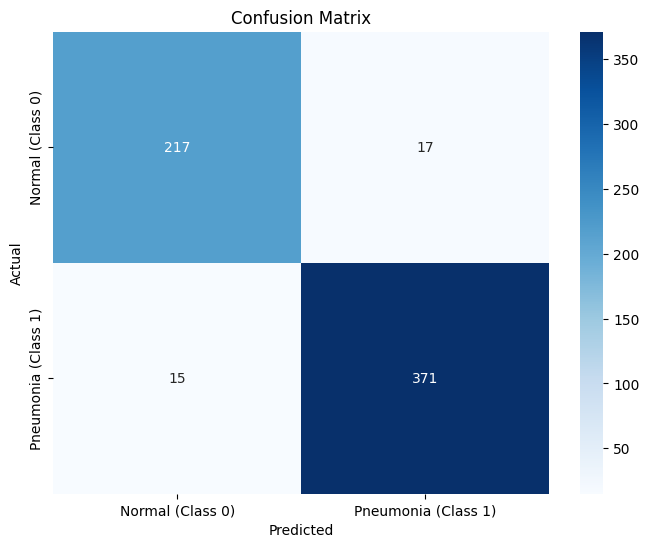

In [ ]:
test_predictions = dense4.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Batch size


---

In the realm of training Convolutional Neural Networks (CNNs), the batch size is a crucial hyperparameter that defines the number of training samples utilized in one iteration. During each iteration, the model processes a subset or "batch" of the training data, and the weights are updated accordingly.


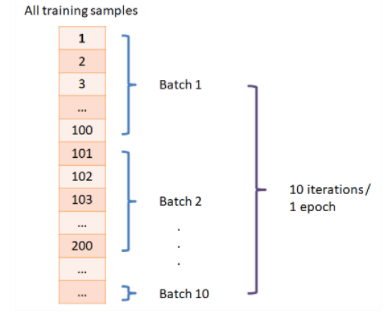

In [ ]:
# Define the CNN model
cnn_model2 = Sequential()

# Convolutional layers
cnn_model2.add(Conv2D(16, 3, padding="same", activation="relu", input_shape=(150, 150, 1)))
cnn_model2.add(MaxPooling2D())

cnn_model2.add(Conv2D(32, 3, padding="same", activation="relu"))
cnn_model2.add(MaxPooling2D())

cnn_model2.add(Conv2D(64, 3, padding="same", activation="relu"))
cnn_model2.add(MaxPooling2D())

cnn_model2.add(Conv2D(128, 3, padding="same", activation="relu"))
cnn_model2.add(MaxPooling2D())

cnn_model2.add(Dropout(0.2))

# Fully connected layers
cnn_model2.add(Flatten())

cnn_model2.add(Dense(256, activation="relu"))
cnn_model2.add(Dense(128, activation="relu"))
cnn_model2.add(Dense(64, activation="relu"))

# Output layer
cnn_model2.add(Dense(1, activation="sigmoid"))  # Sigmoid for binary classification

# Compile the model
cnn_model2.compile(optimizer='adam', loss= "binary_crossentropy", metrics=["accuracy"]) # tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

callback2 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,)

In [ ]:
# Display model summary
cnn_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 16)      160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 75, 75, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 18, 18, 64)       

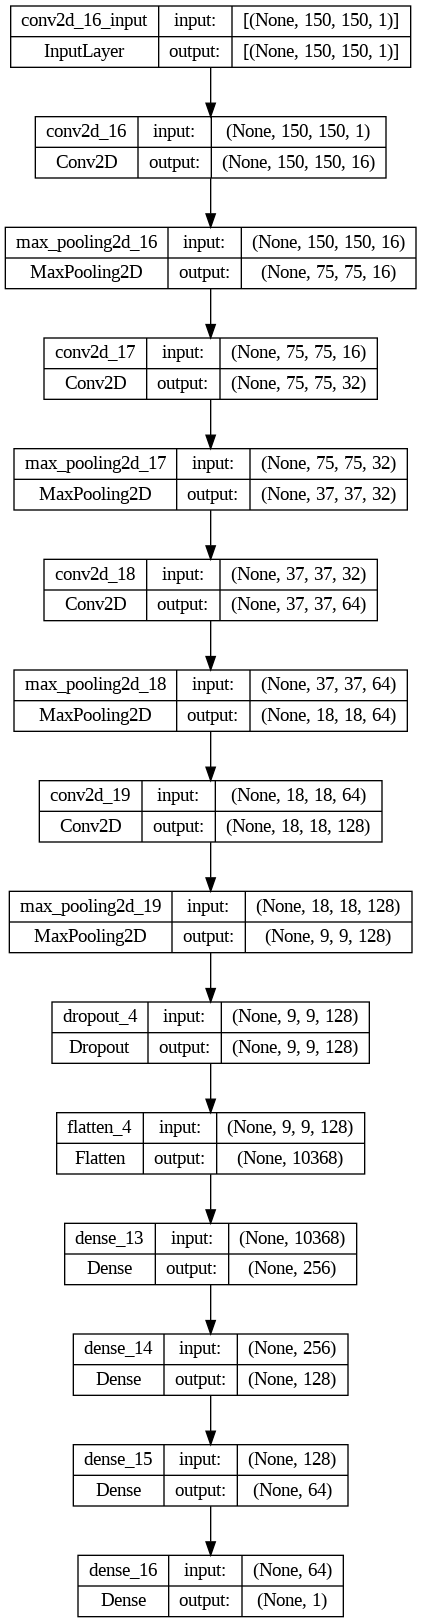

In [ ]:
tf.keras.utils.plot_model(cnn_model2, show_shapes= True)

## Our model architecture after choosing 3 dense layers:

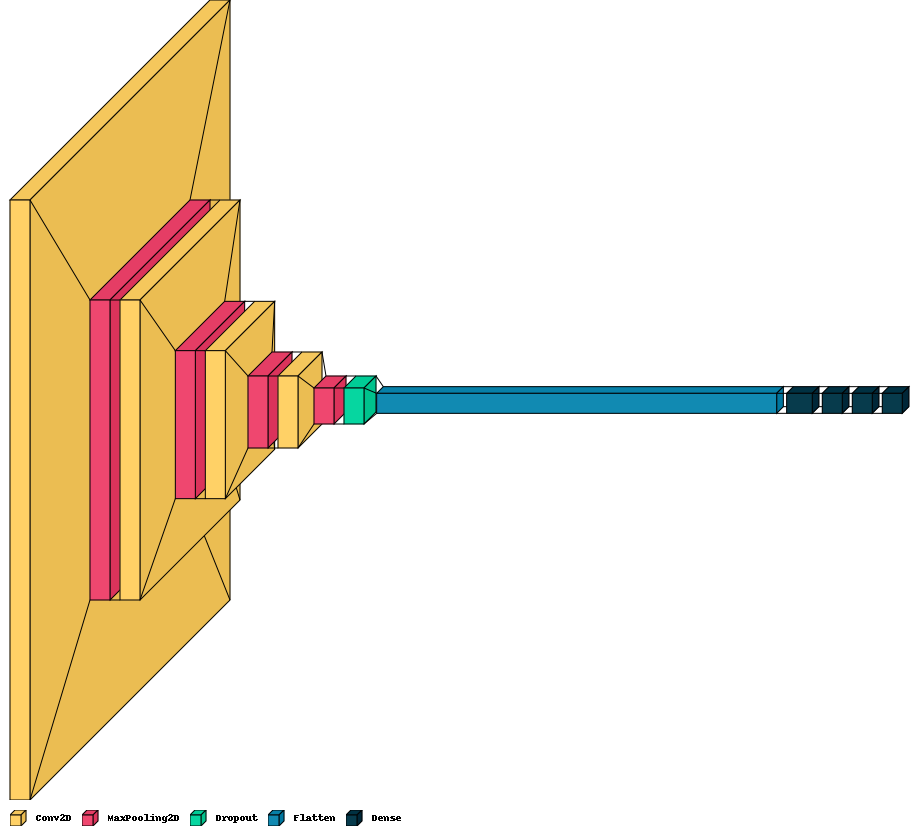

In [ ]:
# Create a layered view of the model
visualkeras.layered_view(cnn_model2, legend=True)

## Size = 64

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=cnn_model2.fit(train_datagen.flow(x_train,y_train, batch_size = 64), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 64) ,callbacks = callback)

Epoch 1/100
92/92 [==============================] - 193s 2s/step - loss: 0.1923 - accuracy: 0.9248 - val_loss: 0.1637 - val_accuracy: 0.9405
Epoch 2/100
92/92 [==============================] - 197s 2s/step - loss: 0.1871 - accuracy: 0.9299 - val_loss: 0.1581 - val_accuracy: 0.9433
Epoch 3/100
92/92 [==============================] - 183s 2s/step - loss: 0.1737 - accuracy: 0.9328 - val_loss: 0.1490 - val_accuracy: 0.9446
Epoch 4/100
92/92 [==============================] - 182s 2s/step - loss: 0.1674 - accuracy: 0.9385 - val_loss: 0.1568 - val_accuracy: 0.9433
Epoch 5/100
92/92 [==============================] - 186s 2s/step - loss: 0.1628 - accuracy: 0.9368 - val_loss: 0.1447 - val_accuracy: 0.9508
Epoch 6/100
92/92 [==============================] - 179s 2s/step - loss: 0.1588 - accuracy: 0.9424 - val_loss: 0.1609 - val_accuracy: 0.9385
Epoch 7/100
92/92 [==============================] - 174s 2s/step - loss: 0.1704 - accuracy: 0.9352 - val_loss: 0.1425 - val_accuracy: 0.9460
Epoch 

In [ ]:
test_results64= cnn_model2.evaluate(test_datagen.flow(x_test,y_test, batch_size=64))
print("Test Loss:", test_results64[0])
print("Test Accuracy:", test_results64[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results64[1]*100,2)))

10/10 [==============================] - 6s 571ms/step - loss: 0.1114 - accuracy: 0.9629
Test Loss: 0.11137855052947998
Test Accuracy: 0.9629032015800476
The current model achieved a categorical accuracy of 96.29%


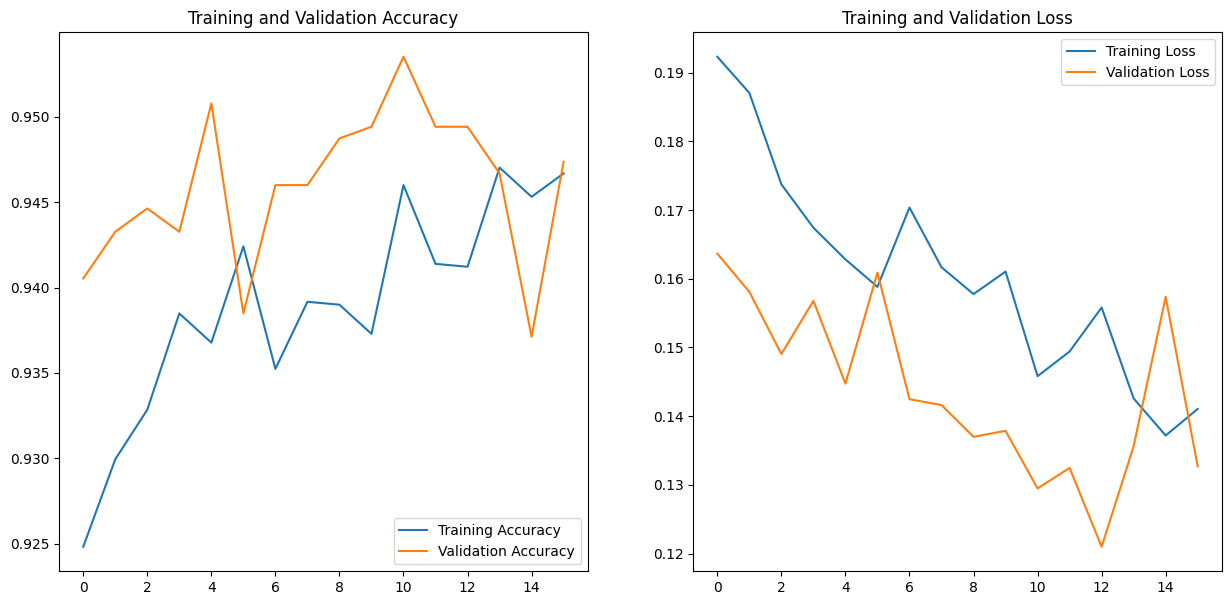

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20/20 [==============================] - 4s 183ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.96      0.94      0.95       234
Pneumonia (Class 1)       0.97      0.97      0.97       386

           accuracy                           0.96       620
          macro avg       0.96      0.96      0.96       620
       weighted avg       0.96      0.96      0.96       620



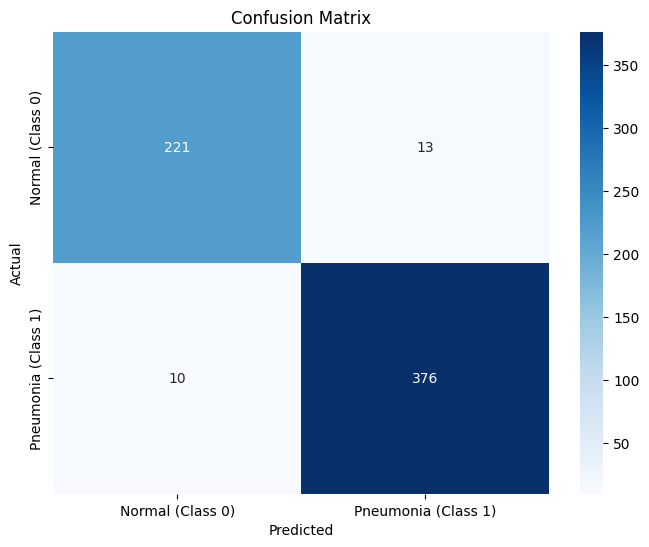

In [ ]:
test_predictions = cnn_model2.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Size = 128

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=cnn_model2.fit(train_datagen.flow(x_train,y_train, batch_size = 128), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 128) ,callbacks = callback)

Epoch 1/100
46/46 [==============================] - 190s 4s/step - loss: 0.6066 - accuracy: 0.6661 - val_loss: 0.4388 - val_accuracy: 0.8148
Epoch 2/100
46/46 [==============================] - 183s 4s/step - loss: 0.3759 - accuracy: 0.8401 - val_loss: 0.3306 - val_accuracy: 0.8592
Epoch 3/100
46/46 [==============================] - 180s 4s/step - loss: 0.2883 - accuracy: 0.8840 - val_loss: 0.2409 - val_accuracy: 0.9043
Epoch 4/100
46/46 [==============================] - 181s 4s/step - loss: 0.2533 - accuracy: 0.9036 - val_loss: 0.2277 - val_accuracy: 0.9166
Epoch 5/100
46/46 [==============================] - 178s 4s/step - loss: 0.2452 - accuracy: 0.9036 - val_loss: 0.2095 - val_accuracy: 0.9282
Epoch 6/100
46/46 [==============================] - 179s 4s/step - loss: 0.2480 - accuracy: 0.9017 - val_loss: 0.2324 - val_accuracy: 0.9098
Epoch 7/100
46/46 [==============================] - 182s 4s/step - loss: 0.2200 - accuracy: 0.9146 - val_loss: 0.1978 - val_accuracy: 0.9234
Epoch 

In [ ]:
test_results28 = cnn_model2.evaluate(test_datagen.flow(x_test,y_test, batch_size=128))
print("Test Loss:", test_results28[0])
print("Test Accuracy:", test_results28[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results28[1]*100,2)))

5/5 [==============================] - 6s 1s/step - loss: 0.1254 - accuracy: 0.9565
Test Loss: 0.1254452019929886
Test Accuracy: 0.9564515948295593
The current model achieved a categorical accuracy of 95.65%


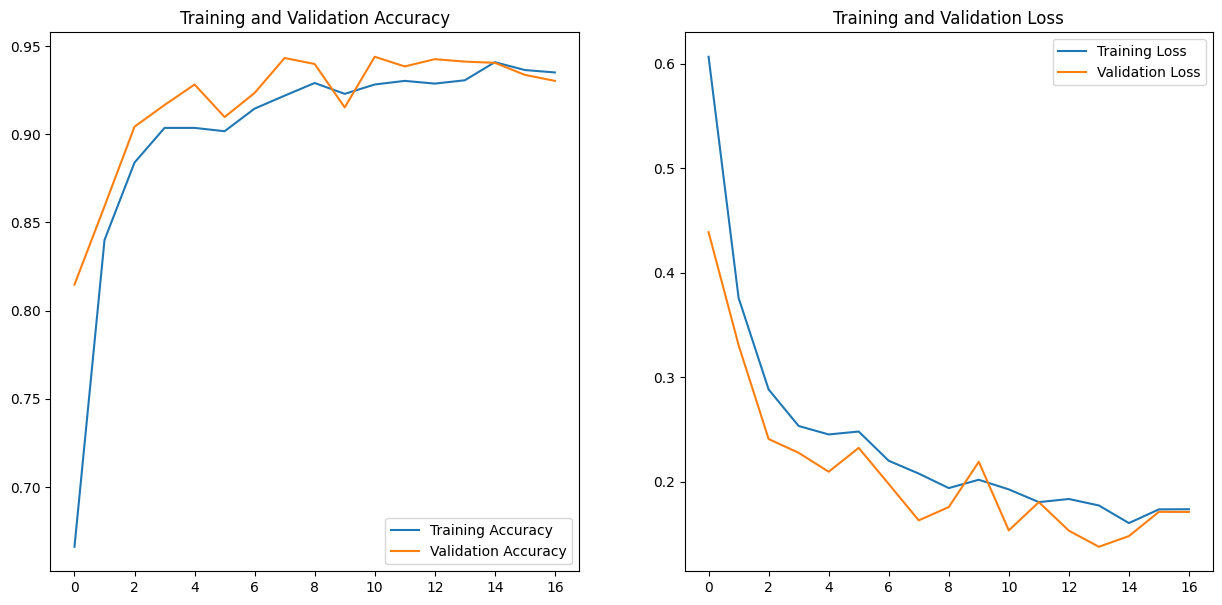

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20/20 [==============================] - 4s 190ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.97      0.91      0.94       234
Pneumonia (Class 1)       0.95      0.98      0.97       386

           accuracy                           0.96       620
          macro avg       0.96      0.95      0.95       620
       weighted avg       0.96      0.96      0.96       620



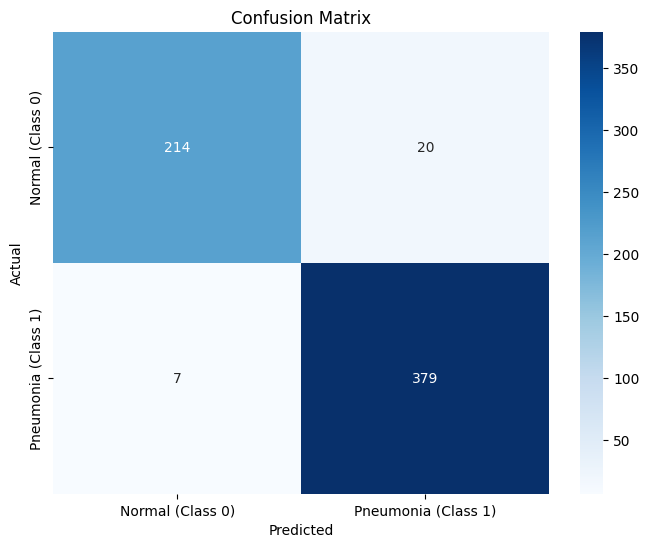

In [ ]:
test_predictions = cnn_model2.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. Weight intializing

---

While building and training neural networks, it is crucial to initialize the weights appropriately to ensure a model with high accuracy. If the weights are not correctly initialized, it may give rise to the Vanishing Gradient problem or the Exploding Gradient problem. Hence, selecting an appropriate weight initialization strategy is critical when training DL models.

In [ ]:
def model2(weight_initializer):
  # Define the CNN model
  cnn_model = Sequential()

  # Convolutional layers
  cnn_model.add(Conv2D(16, 3, padding="same", activation="relu", input_shape=(150, 150, 1)))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Conv2D(32, 3, padding="same", activation="relu"))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Conv2D(64, 3, padding="same", activation="relu"))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Conv2D(128, 3, padding="same", activation="relu"))
  cnn_model.add(MaxPooling2D())

  cnn_model.add(Dropout(0.2))

  # Fully connected layers
  cnn_model.add(Flatten())

  cnn_model.add(Dense(256, activation="relu",kernel_initializer=weight_initializer))
  cnn_model.add(Dense(128, activation="relu",kernel_initializer=weight_initializer))
  cnn_model.add(Dense(64, activation="relu",kernel_initializer=weight_initializer))

  # Output layer
  cnn_model.add(Dense(1, activation="sigmoid",kernel_initializer=weight_initializer))  # Sigmoid for binary classification

  # Compile the model
  cnn_model.compile(optimizer='adam', loss= "binary_crossentropy", metrics=["accuracy"])

  # Display model summary
  return cnn_model

## Glorot normal weight initializer

In [ ]:
initializer = tf.keras.initializers.GlorotNormal()
gnormal = model2(initializer)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=gnormal.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 170s 914ms/step - loss: 0.5879 - accuracy: 0.6647 - val_loss: 0.3317 - val_accuracy: 0.8640
Epoch 2/100
183/183 [==============================] - 177s 967ms/step - loss: 0.2941 - accuracy: 0.8773 - val_loss: 0.2200 - val_accuracy: 0.9146
Epoch 3/100
183/183 [==============================] - 178s 976ms/step - loss: 0.2526 - accuracy: 0.9000 - val_loss: 0.1911 - val_accuracy: 0.9323
Epoch 4/100
183/183 [==============================] - 169s 923ms/step - loss: 0.2356 - accuracy: 0.9070 - val_loss: 0.2068 - val_accuracy: 0.9125
Epoch 5/100
183/183 [==============================] - 179s 977ms/step - loss: 0.2334 - accuracy: 0.9115 - val_loss: 0.2351 - val_accuracy: 0.9098
Epoch 6/100
183/183 [==============================] - 180s 982ms/step - loss: 0.2094 - accuracy: 0.9253 - val_loss: 0.2027 - val_accuracy: 0.9234


In [ ]:
gtest_results = gnormal.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", gtest_results[0])
print("Test Accuracy:", gtest_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(gtest_results[1]*100,2)))

20/20 [==============================] - 4s 182ms/step - loss: 0.1762 - accuracy: 0.9387
Test Loss: 0.1762397438287735
Test Accuracy: 0.9387096762657166
The current model achieved a categorical accuracy of 93.87%


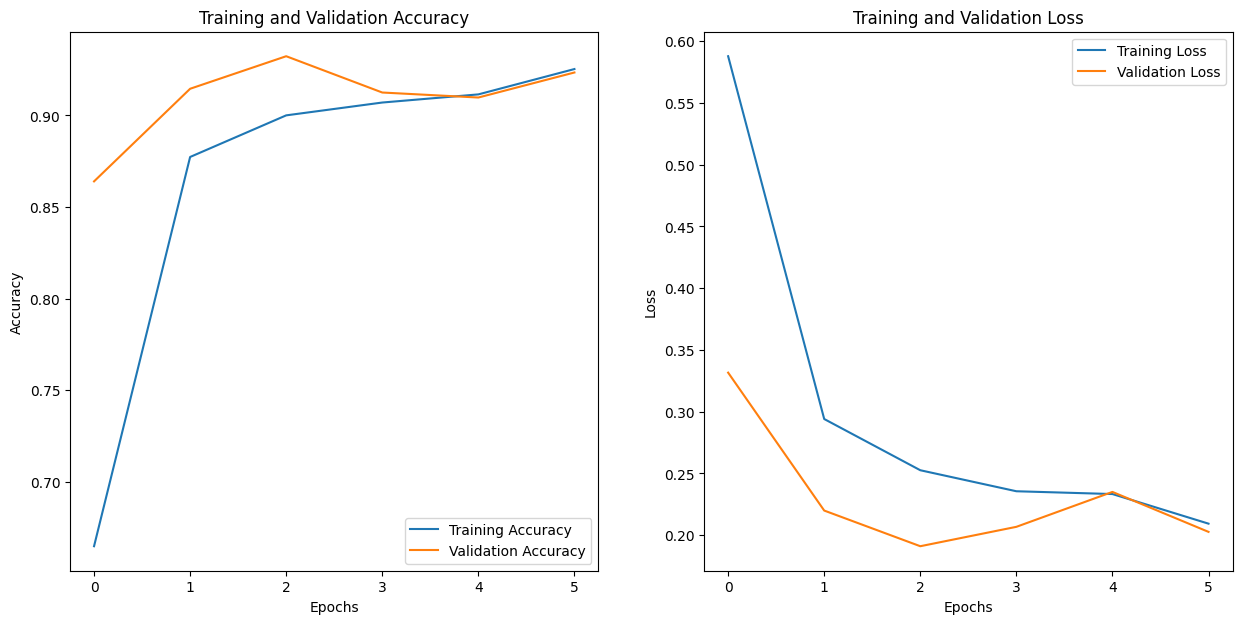

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 4s 207ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.93      0.90      0.92       234
Pneumonia (Class 1)       0.94      0.96      0.95       386

           accuracy                           0.94       620
          macro avg       0.94      0.93      0.93       620
       weighted avg       0.94      0.94      0.94       620



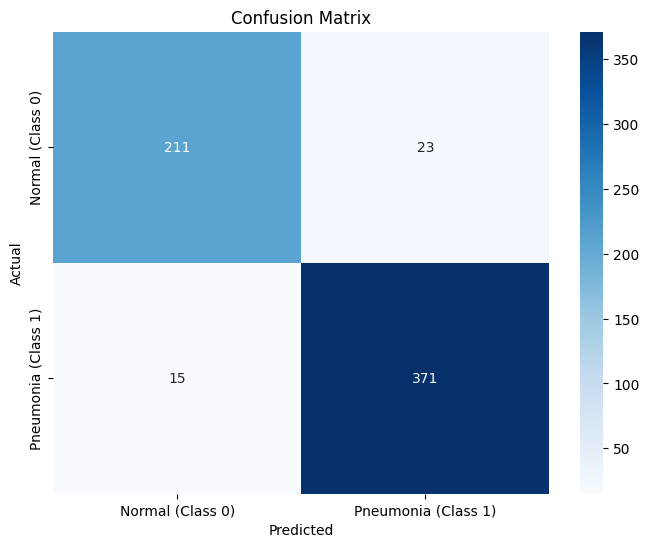

In [ ]:
test_predictions = gnormal.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## truncated normal intializer

In [ ]:
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
tnormal = model2(initializer)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=tnormal.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 174s 926ms/step - loss: 16.1587 - accuracy: 0.6022 - val_loss: 0.5516 - val_accuracy: 0.7150
Epoch 2/100
183/183 [==============================] - 176s 963ms/step - loss: 0.5659 - accuracy: 0.7172 - val_loss: 0.5312 - val_accuracy: 0.7314
Epoch 3/100
183/183 [==============================] - 171s 930ms/step - loss: 0.5493 - accuracy: 0.7350 - val_loss: 0.4236 - val_accuracy: 0.8113
Epoch 4/100
183/183 [==============================] - 180s 981ms/step - loss: 0.4536 - accuracy: 0.7907 - val_loss: 0.3450 - val_accuracy: 0.8455
Epoch 5/100
183/183 [==============================] - 177s 967ms/step - loss: 0.4589 - accuracy: 0.7857 - val_loss: 0.3400 - val_accuracy: 0.8530
Epoch 6/100
183/183 [==============================] - 179s 977ms/step - loss: 0.4540 - accuracy: 0.7939 - val_loss: 0.3240 - val_accuracy: 0.8653
Epoch 7/100
183/183 [==============================] - 182s 993ms/step - loss: 0.3989 - accuracy: 0.8307 - val_loss: 

In [ ]:
ttest_results = tnormal.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", ttest_results[0])
print("Test Accuracy:", ttest_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(ttest_results[1]*100,2)))

20/20 [==============================] - 5s 249ms/step - loss: 0.3191 - accuracy: 0.8758
Test Loss: 0.31911537051200867
Test Accuracy: 0.875806450843811
The current model achieved a categorical accuracy of 87.58%


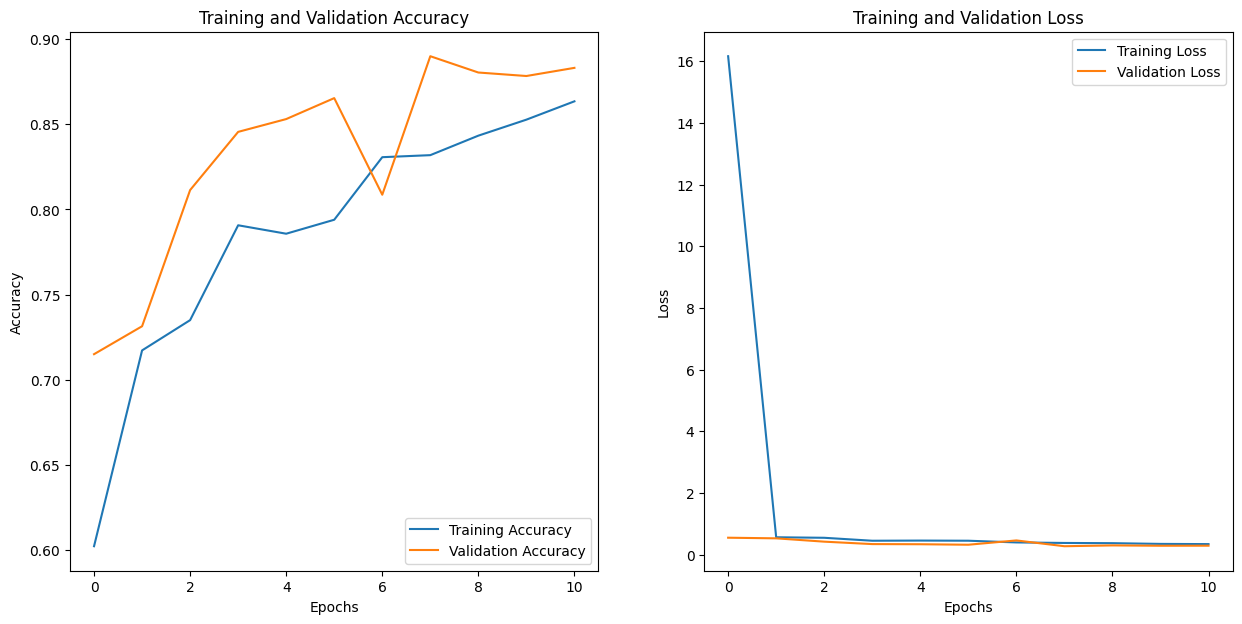

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 5s 178ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.80      0.89      0.84       234
Pneumonia (Class 1)       0.93      0.87      0.90       386

           accuracy                           0.88       620
          macro avg       0.87      0.88      0.87       620
       weighted avg       0.88      0.88      0.88       620



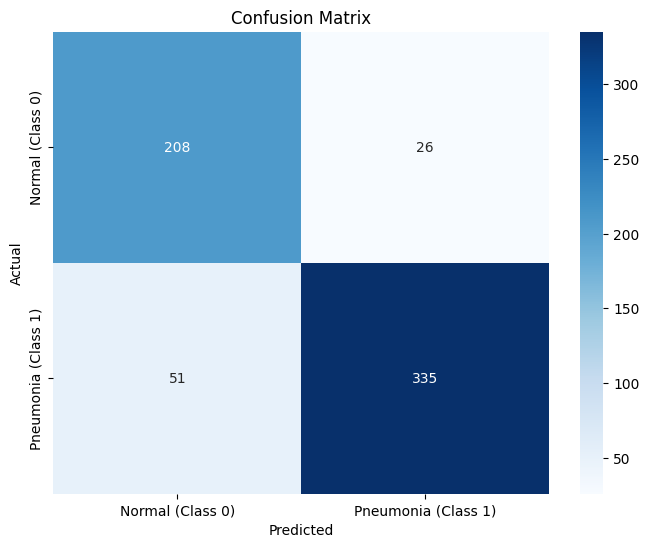

In [ ]:
test_predictions = tnormal.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random normal intializer

In [ ]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
rnormal = model2(initializer)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=rnormal.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 177s 960ms/step - loss: 27.1237 - accuracy: 0.6553 - val_loss: 0.4574 - val_accuracy: 0.8154
Epoch 2/100
183/183 [==============================] - 175s 956ms/step - loss: 0.4644 - accuracy: 0.7990 - val_loss: 0.3563 - val_accuracy: 0.8565
Epoch 3/100
183/183 [==============================] - 171s 933ms/step - loss: 0.3992 - accuracy: 0.8341 - val_loss: 0.3059 - val_accuracy: 0.8790
Epoch 4/100
183/183 [==============================] - 167s 914ms/step - loss: 0.3861 - accuracy: 0.8395 - val_loss: 0.3074 - val_accuracy: 0.8715
Epoch 5/100
183/183 [==============================] - 174s 953ms/step - loss: 0.3747 - accuracy: 0.8435 - val_loss: 0.3659 - val_accuracy: 0.8401
Epoch 6/100
183/183 [==============================] - 177s 968ms/step - loss: 0.3862 - accuracy: 0.8341 - val_loss: 0.6635 - val_accuracy: 0.7150


In [ ]:
rtest_results = rnormal.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", rtest_results[0])
print("Test Accuracy:", rtest_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(rtest_results[1]*100,2)))

20/20 [==============================] - 6s 296ms/step - loss: 0.3293 - accuracy: 0.8726
Test Loss: 0.32930463552474976
Test Accuracy: 0.8725806474685669
The current model achieved a categorical accuracy of 87.26%


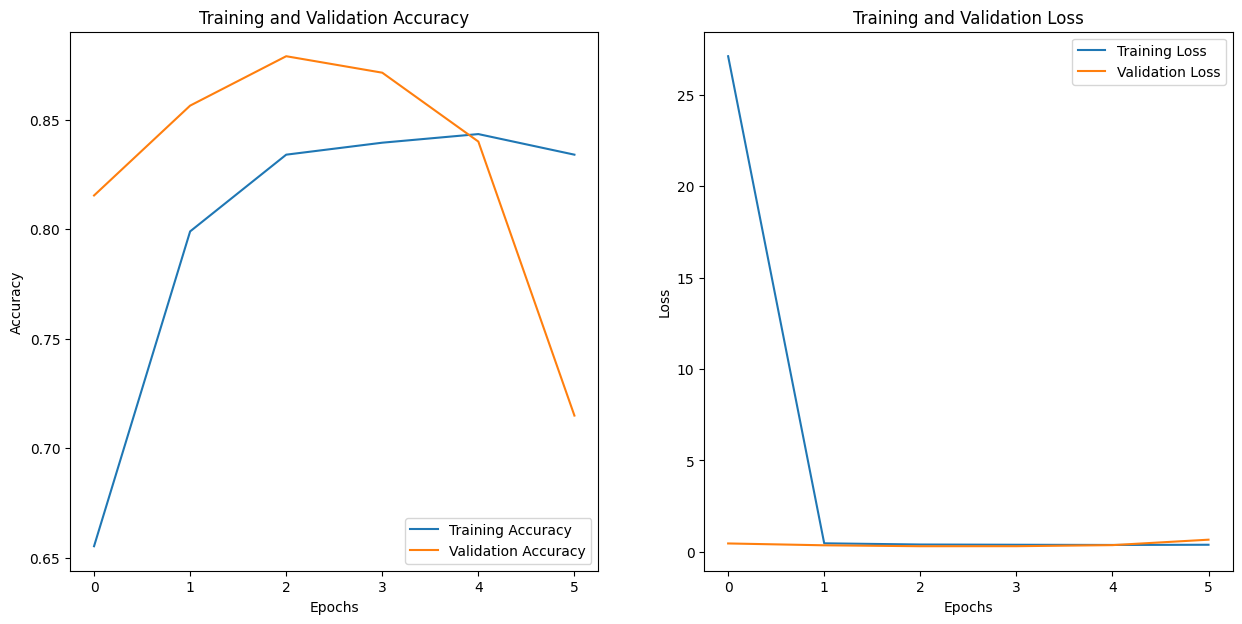

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 4s 177ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.80      0.88      0.84       234
Pneumonia (Class 1)       0.92      0.87      0.89       386

           accuracy                           0.87       620
          macro avg       0.86      0.87      0.87       620
       weighted avg       0.88      0.87      0.87       620



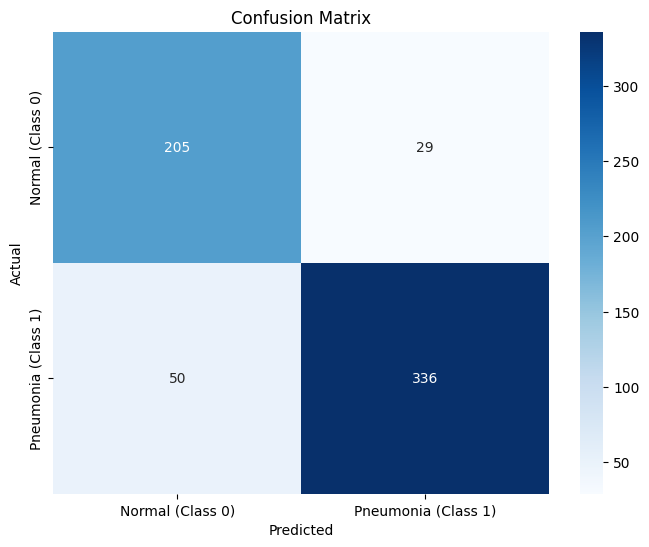

In [ ]:
test_predictions = rnormal.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## He normal initializer

In [ ]:
initializer = tf.keras.initializers.HeNormal()
hnormal = model2(initializer)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=hnormal.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 177s 945ms/step - loss: 0.4774 - accuracy: 0.7488 - val_loss: 0.2712 - val_accuracy: 0.9077
Epoch 2/100
183/183 [==============================] - 178s 975ms/step - loss: 0.2918 - accuracy: 0.8843 - val_loss: 0.2151 - val_accuracy: 0.9057
Epoch 3/100
183/183 [==============================] - 170s 928ms/step - loss: 0.2637 - accuracy: 0.8939 - val_loss: 0.1989 - val_accuracy: 0.9180
Epoch 4/100
183/183 [==============================] - 178s 971ms/step - loss: 0.2380 - accuracy: 0.9084 - val_loss: 0.1812 - val_accuracy: 0.9289
Epoch 5/100
183/183 [==============================] - 187s 1s/step - loss: 0.2154 - accuracy: 0.9173 - val_loss: 0.1718 - val_accuracy: 0.9289
Epoch 6/100
183/183 [==============================] - 182s 989ms/step - loss: 0.2010 - accuracy: 0.9228 - val_loss: 0.1616 - val_accuracy: 0.9426
Epoch 7/100
183/183 [==============================] - 176s 960ms/step - loss: 0.1983 - accuracy: 0.9233 - val_loss: 0.18

In [ ]:
htest_results = hnormal.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", htest_results[0])
print("Test Accuracy:", htest_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(htest_results[1]*100,2)))

20/20 [==============================] - 3s 171ms/step - loss: 0.1396 - accuracy: 0.9516
Test Loss: 0.13959762454032898
Test Accuracy: 0.9516128897666931
The current model achieved a categorical accuracy of 95.16%


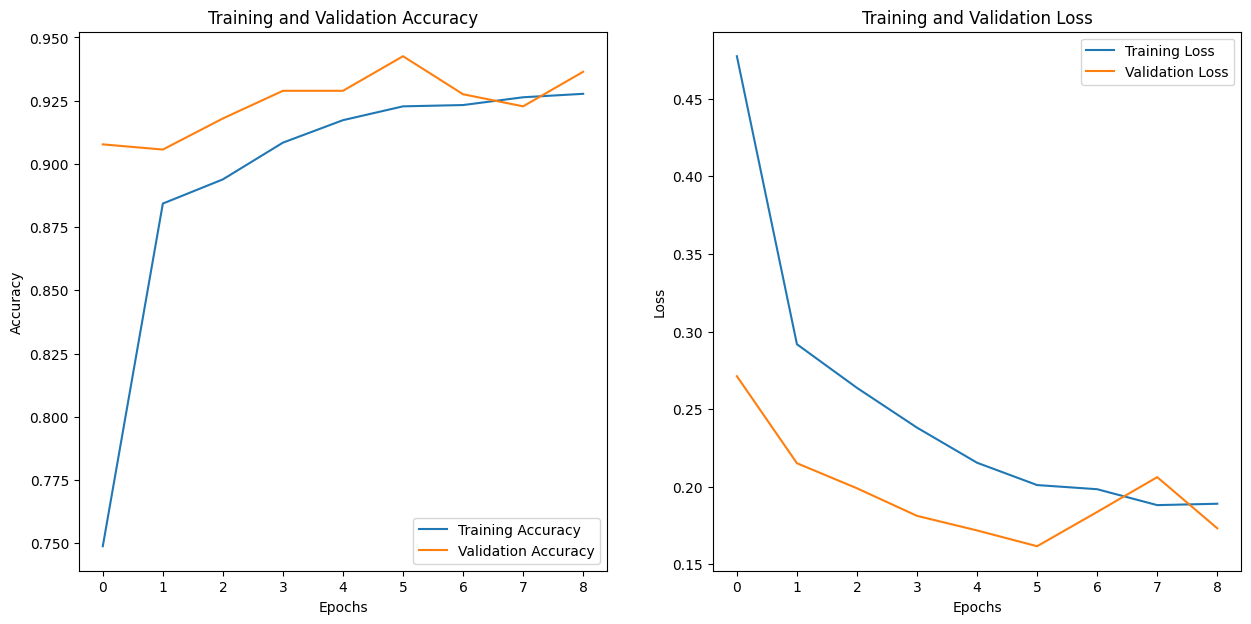

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 3s 169ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.96      0.91      0.93       234
Pneumonia (Class 1)       0.95      0.98      0.96       386

           accuracy                           0.95       620
          macro avg       0.95      0.94      0.95       620
       weighted avg       0.95      0.95      0.95       620



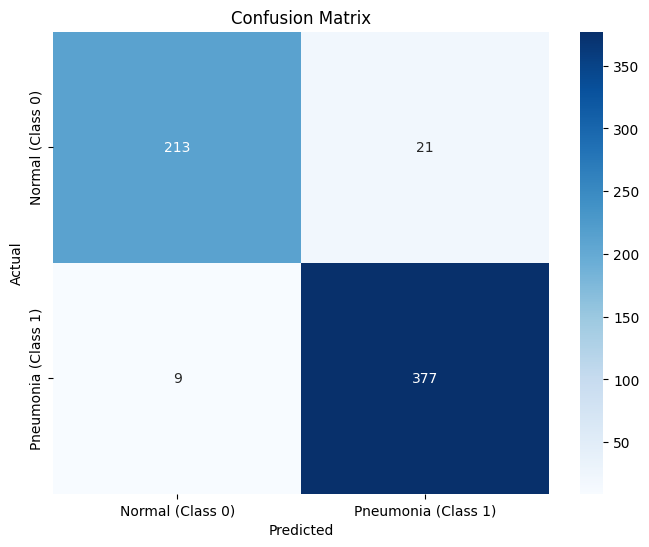

In [ ]:
test_predictions = hnormal.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparison


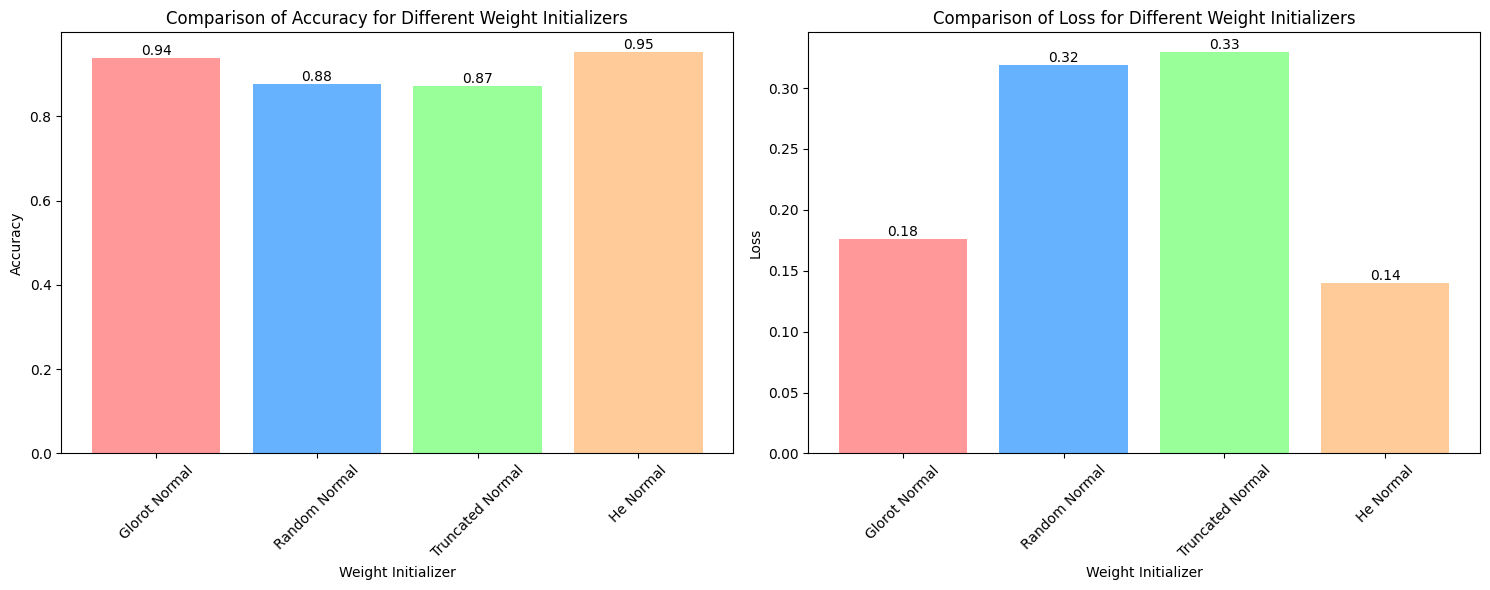

In [ ]:
initializers = ["Glorot Normal", "Random Normal", "Truncated Normal", "He Normal"]

# Results for accuracy and loss
accuracy_results = [gtest_results[1], ttest_results[1], rtest_results[1], htest_results[1]]
loss_results = [gtest_results[0], ttest_results[0], rtest_results[0], htest_results[0]]

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Accuracy
axes[0].bar(initializers, accuracy_results, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
axes[0].set_xlabel('Weight Initializer')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparison of Accuracy for Different Weight Initializers')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add annotations for accuracy
for i, acc in enumerate(accuracy_results):
    axes[0].text(i, acc, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

# Plot for Loss
axes[1].bar(initializers, loss_results, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
axes[1].set_xlabel('Weight Initializer')
axes[1].set_ylabel('Loss')
axes[1].set_title('Comparison of Loss for Different Weight Initializers')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add annotations for loss
for i, loss in enumerate(loss_results):
    axes[1].text(i, loss, f'{loss:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#4. Pooling Layer


---

The pooling layer is a crucial component of Convolutional Neural Networks (CNNs), designed to down-sample the spatial dimensions of the input volume, reducing the computational complexity and the number of parameters in the network. Pooling is typically applied after convolutional layers in CNN architectures.

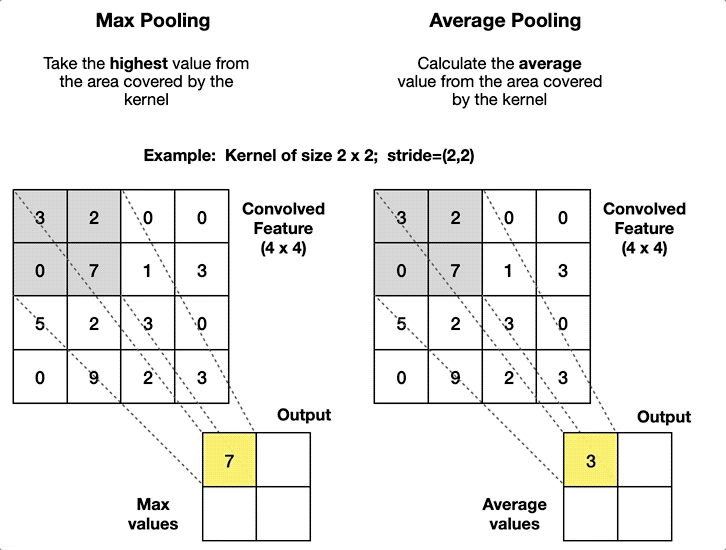

In [28]:
def create_cnn_model(pooling_method='max'):
    # Define the CNN model
    cnn_model = Sequential()

    # Convolutional layers
    cnn_model.add(Conv2D(16, 3, padding="same", activation="relu", input_shape=(150, 150, 1)))

    if pooling_method == 'max':
        pooling_layer = MaxPooling2D()
    elif pooling_method == 'average':
        pooling_layer = AveragePooling2D()

    cnn_model.add(pooling_layer)

    cnn_model.add(Conv2D(32, 3, padding="same", activation="relu"))
    cnn_model.add(pooling_layer)

    cnn_model.add(Conv2D(64, 3, padding="same", activation="relu"))
    cnn_model.add(pooling_layer)

    cnn_model.add(Conv2D(128, 3, padding="same", activation="relu"))
    cnn_model.add(pooling_layer)

    cnn_model.add(Dropout(0.2))

    # Fully connected layers
    cnn_model.add(Flatten())

    cnn_model.add(Dense(256, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    cnn_model.add(Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    cnn_model.add(Dense(64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    cnn_model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.HeNormal()))

    # Compile the model
    cnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

    return cnn_model

## Max Pooling



In [29]:
max_pooling = create_cnn_model(pooling_method='max')
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=max_pooling.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 110s 588ms/step - loss: 0.4422 - accuracy: 0.7857 - val_loss: 0.3020 - val_accuracy: 0.8701
Epoch 2/100
183/183 [==============================] - 100s 545ms/step - loss: 0.2847 - accuracy: 0.8905 - val_loss: 0.2376 - val_accuracy: 0.8961
Epoch 3/100
183/183 [==============================] - 106s 580ms/step - loss: 0.2652 - accuracy: 0.8959 - val_loss: 0.2194 - val_accuracy: 0.9118
Epoch 4/100
183/183 [==============================] - 101s 551ms/step - loss: 0.2340 - accuracy: 0.9081 - val_loss: 0.2181 - val_accuracy: 0.9098
Epoch 5/100
183/183 [==============================] - 100s 544ms/step - loss: 0.2175 - accuracy: 0.9127 - val_loss: 0.2045 - val_accuracy: 0.9146
Epoch 6/100
183/183 [==============================] - 100s 546ms/step - loss: 0.2345 - accuracy: 0.9096 - val_loss: 0.2090 - val_accuracy: 0.9180
Epoch 7/100
183/183 [==============================] - 101s 554ms/step - loss: 0.2229 - accuracy: 0.9115 - val_loss: 0

In [30]:
test_results = max_pooling.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results[1]*100,2)))

20/20 [==============================] - 2s 117ms/step - loss: 0.1390 - accuracy: 0.9532
Test Loss: 0.13896234333515167
Test Accuracy: 0.9532257914543152
The current model achieved a categorical accuracy of 95.32%


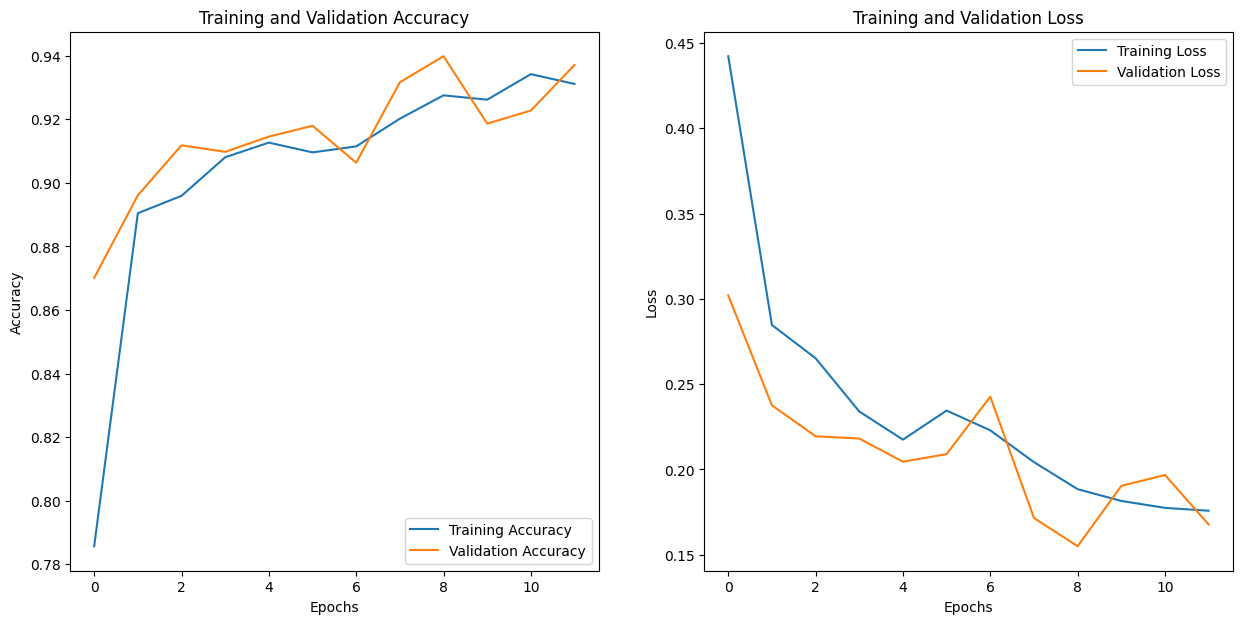

In [31]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 3s 121ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.92      0.96      0.94       234
Pneumonia (Class 1)       0.98      0.95      0.96       386

           accuracy                           0.95       620
          macro avg       0.95      0.95      0.95       620
       weighted avg       0.95      0.95      0.95       620



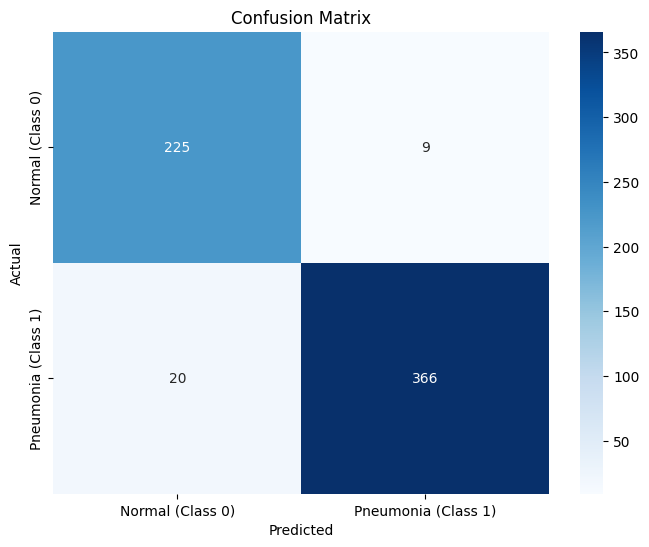

In [32]:
test_predictions = max_pooling.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Average Pooling

In [33]:
avg_pooling = create_cnn_model(pooling_method='average')
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=avg_pooling.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 98s 522ms/step - loss: 0.5207 - accuracy: 0.7268 - val_loss: 0.3607 - val_accuracy: 0.8407
Epoch 2/100
183/183 [==============================] - 93s 511ms/step - loss: 0.3754 - accuracy: 0.8291 - val_loss: 0.3014 - val_accuracy: 0.8688
Epoch 3/100
183/183 [==============================] - 92s 505ms/step - loss: 0.3214 - accuracy: 0.8643 - val_loss: 0.2491 - val_accuracy: 0.9009
Epoch 4/100
183/183 [==============================] - 96s 523ms/step - loss: 0.2795 - accuracy: 0.8838 - val_loss: 0.2282 - val_accuracy: 0.9070
Epoch 5/100
183/183 [==============================] - 94s 510ms/step - loss: 0.2581 - accuracy: 0.8975 - val_loss: 0.2293 - val_accuracy: 0.9077
Epoch 6/100
183/183 [==============================] - 90s 493ms/step - loss: 0.2581 - accuracy: 0.8934 - val_loss: 0.2252 - val_accuracy: 0.9098
Epoch 7/100
183/183 [==============================] - 94s 515ms/step - loss: 0.2267 - accuracy: 0.9147 - val_loss: 0.2047 -

In [34]:
test_results = avg_pooling.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results[1]*100,2)))

20/20 [==============================] - 2s 119ms/step - loss: 0.1348 - accuracy: 0.9468
Test Loss: 0.13484710454940796
Test Accuracy: 0.9467741847038269
The current model achieved a categorical accuracy of 94.68%


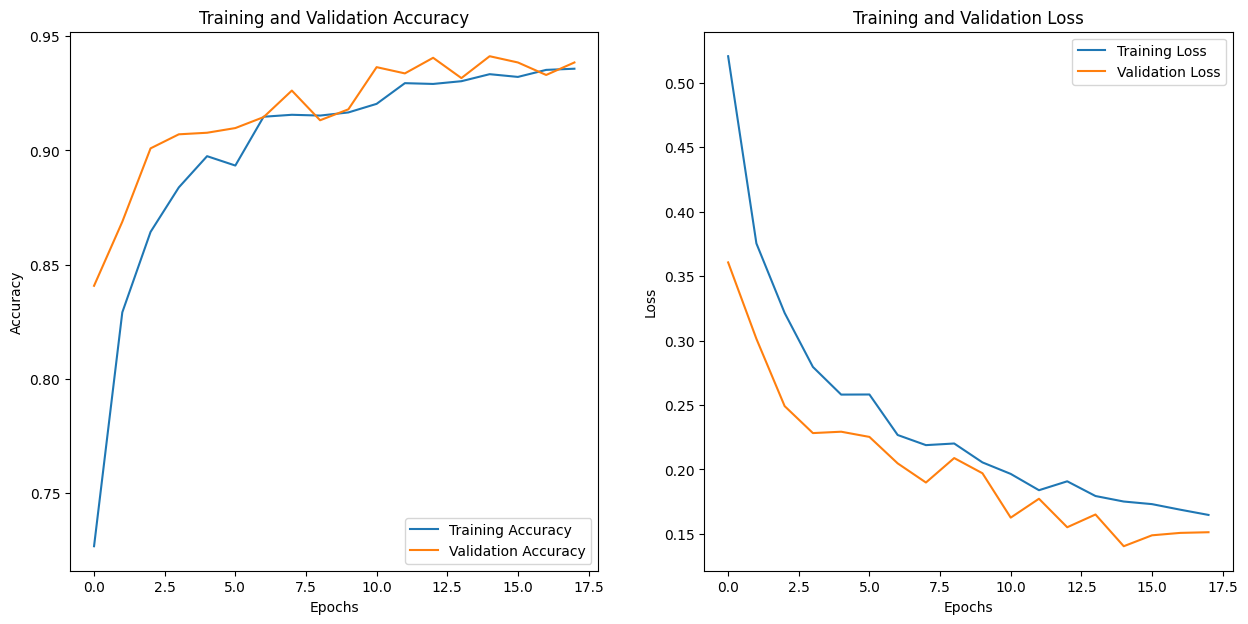

In [35]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 2s 119ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.93      0.93      0.93       234
Pneumonia (Class 1)       0.96      0.96      0.96       386

           accuracy                           0.95       620
          macro avg       0.94      0.94      0.94       620
       weighted avg       0.95      0.95      0.95       620



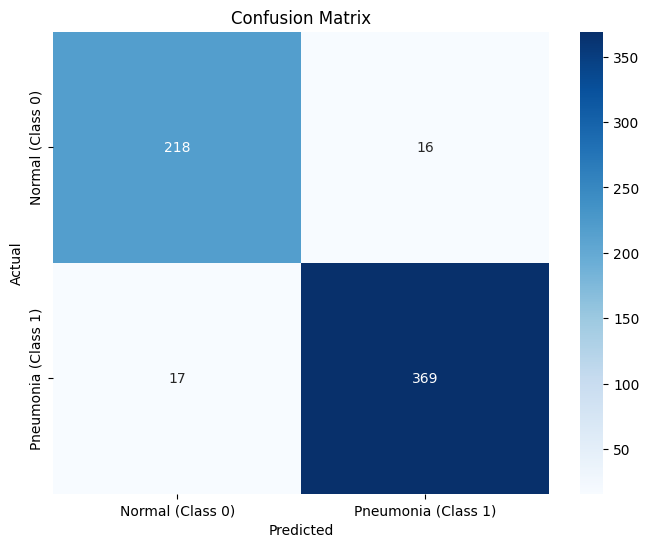

In [36]:
test_predictions = avg_pooling.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#5. Stride parameter in the convolutional layer

---
Stride refers to the step size at which the convolutional filter is moved across the input image.



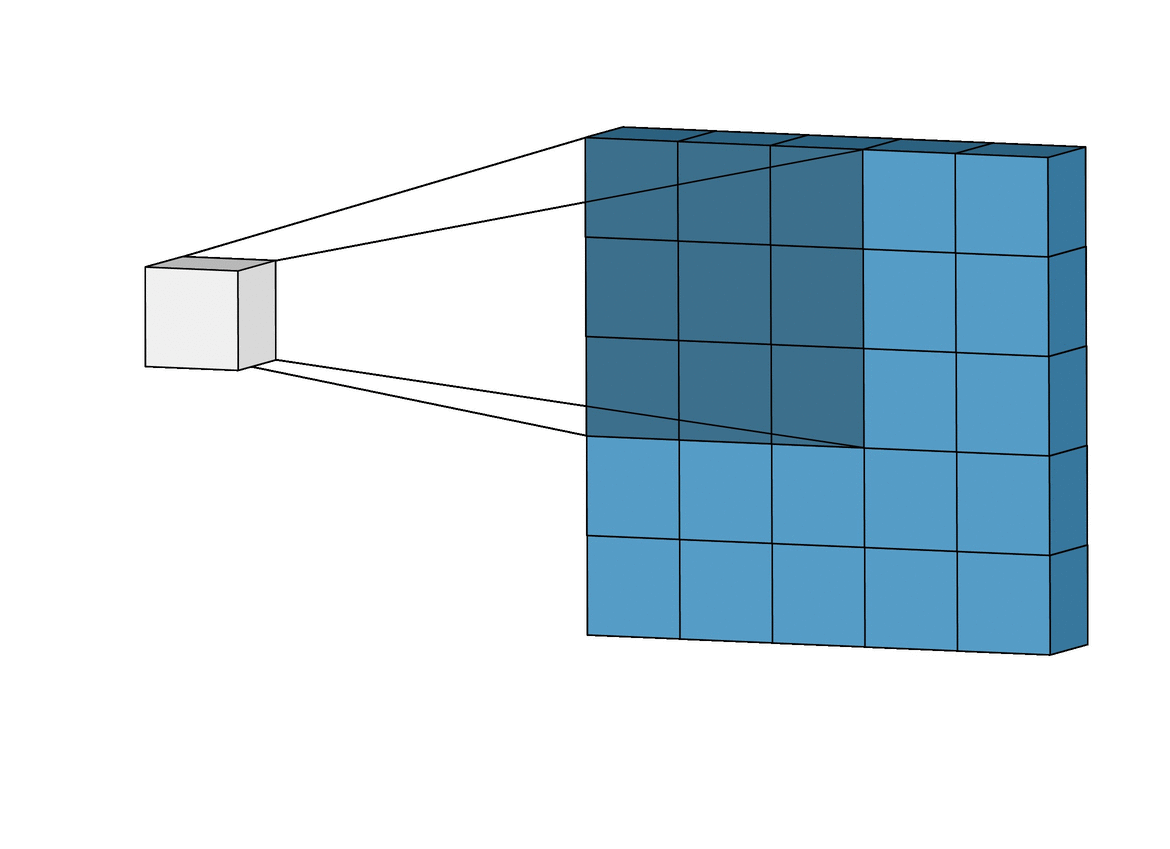

In [ ]:
def create_model(stride):
    model = Sequential()
    model.add(Conv2D(16, 3, padding="same", activation="relu", input_shape=(150, 150, 1), strides=1))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 3, padding="same", activation="relu", strides=stride))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, padding="same", activation="relu", strides=stride))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, 3, padding="same", activation="relu", strides=stride))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(256, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(Dense(64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    return model

## Stride = 2

In [ ]:
model = create_model(2)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32), epochs=100,
                        validation_data=train_datagen.flow(x_val, y_val), callbacks=[callback])

Epoch 1/100
183/183 [==============================] - 90s 475ms/step - loss: 0.5426 - accuracy: 0.7075 - val_loss: 0.3196 - val_accuracy: 0.8626
Epoch 2/100
183/183 [==============================] - 87s 475ms/step - loss: 0.3242 - accuracy: 0.8647 - val_loss: 0.2987 - val_accuracy: 0.8640
Epoch 3/100
183/183 [==============================] - 91s 498ms/step - loss: 0.2947 - accuracy: 0.8794 - val_loss: 0.2430 - val_accuracy: 0.9091
Epoch 4/100
183/183 [==============================] - 115s 632ms/step - loss: 0.2711 - accuracy: 0.8864 - val_loss: 0.2331 - val_accuracy: 0.9091
Epoch 5/100
183/183 [==============================] - 112s 605ms/step - loss: 0.2534 - accuracy: 0.8999 - val_loss: 0.1857 - val_accuracy: 0.9221
Epoch 6/100
183/183 [==============================] - 87s 476ms/step - loss: 0.2339 - accuracy: 0.9111 - val_loss: 0.1958 - val_accuracy: 0.9275
Epoch 7/100
183/183 [==============================] - 89s 487ms/step - loss: 0.2340 - accuracy: 0.9093 - val_loss: 0.2200

In [ ]:
test_results = model.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results[1]*100,2)))

20/20 [==============================] - 5s 245ms/step - loss: 0.1734 - accuracy: 0.9403
Test Loss: 0.17342762649059296
Test Accuracy: 0.9403225779533386
The current model achieved a categorical accuracy of 94.03%


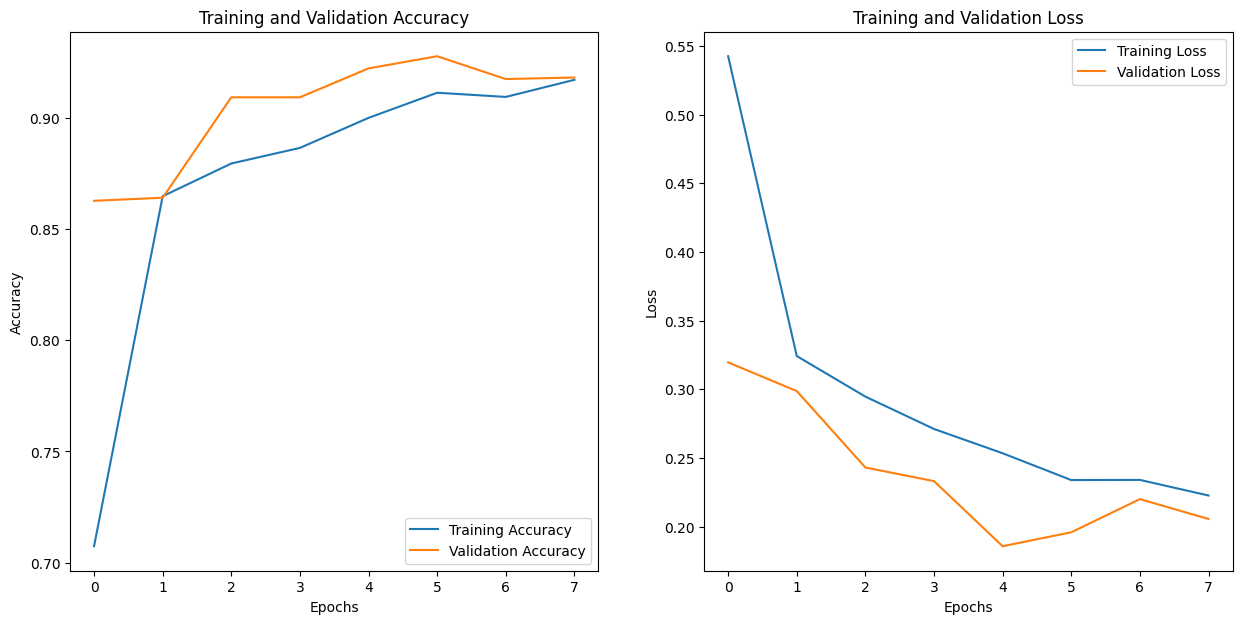

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 2s 105ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.91      0.93      0.92       234
Pneumonia (Class 1)       0.96      0.95      0.95       386

           accuracy                           0.94       620
          macro avg       0.94      0.94      0.94       620
       weighted avg       0.94      0.94      0.94       620



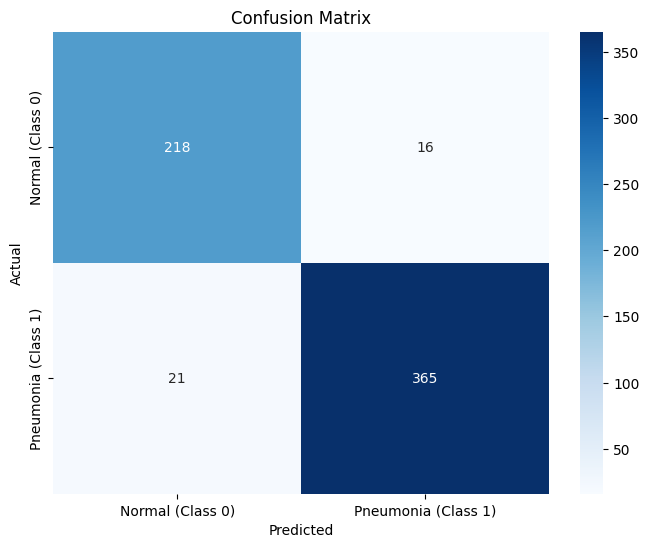

In [ ]:
test_predictions = model.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#6. Padding

---

In convolutional neural networks (CNNs), padding refers to the additional pixels added to the input images around the edges. This extra border of pixels helps to preserve spatial information during the convolutional and pooling operations. There are two common types of padding: 'valid' (no padding) and 'same' (zero or symmetric padding).


In [ ]:
def create_model(padding):
    model = Sequential()
    model.add(Conv2D(16, 3, padding=padding, activation="relu", input_shape=(150, 150, 1)))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 3, padding=padding, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, padding=padding, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, 3, padding=padding, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(Dense(64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.HeNormal()))
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    return model

## Same Padding

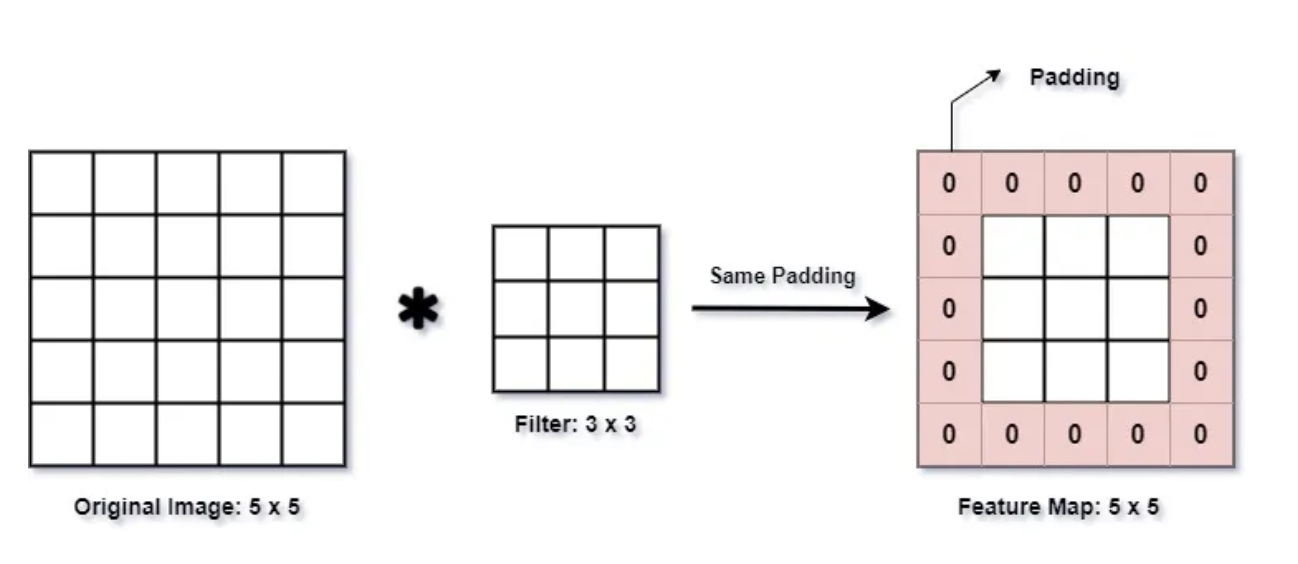

## Valid Padding

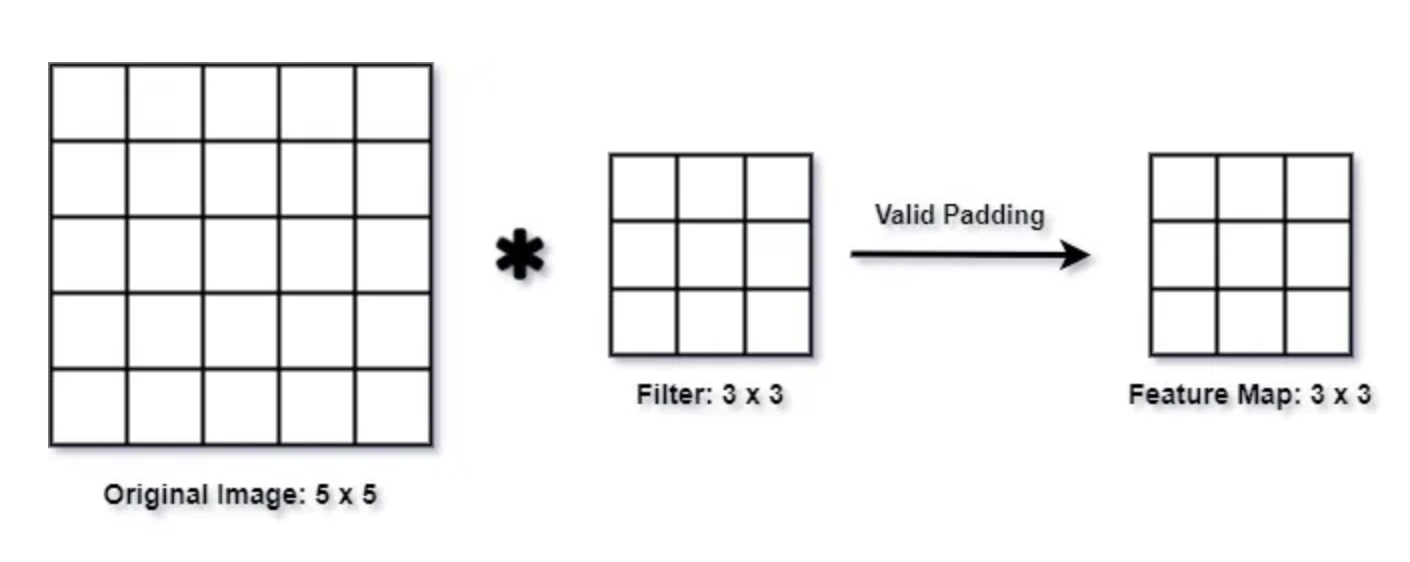

In [ ]:
vmodel = create_model('valid')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = vmodel.fit(train_datagen.flow(x_train, y_train, batch_size=32), epochs=100,
                        validation_data=train_datagen.flow(x_val, y_val), callbacks=[callback])

Epoch 1/100
183/183 [==============================] - 197s 1s/step - loss: 0.4834 - accuracy: 0.7560 - val_loss: 0.3444 - val_accuracy: 0.8763
Epoch 2/100
183/183 [==============================] - 166s 907ms/step - loss: 0.3124 - accuracy: 0.8753 - val_loss: 0.2348 - val_accuracy: 0.9064
Epoch 3/100
183/183 [==============================] - 157s 860ms/step - loss: 0.2539 - accuracy: 0.8978 - val_loss: 0.2189 - val_accuracy: 0.9146
Epoch 4/100
183/183 [==============================] - 154s 841ms/step - loss: 0.2462 - accuracy: 0.9076 - val_loss: 0.2039 - val_accuracy: 0.9221
Epoch 5/100
183/183 [==============================] - 164s 895ms/step - loss: 0.2243 - accuracy: 0.9096 - val_loss: 0.2067 - val_accuracy: 0.9221
Epoch 6/100
183/183 [==============================] - 163s 886ms/step - loss: 0.2170 - accuracy: 0.9192 - val_loss: 0.1837 - val_accuracy: 0.9344
Epoch 7/100
183/183 [==============================] - 163s 894ms/step - loss: 0.2104 - accuracy: 0.9188 - val_loss: 0.17

In [ ]:
test_results = vmodel.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results[1]*100,2)))

20/20 [==============================] - 6s 270ms/step - loss: 0.1437 - accuracy: 0.9532
Test Loss: 0.14365005493164062
Test Accuracy: 0.9532257914543152
The current model achieved a categorical accuracy of 95.32%


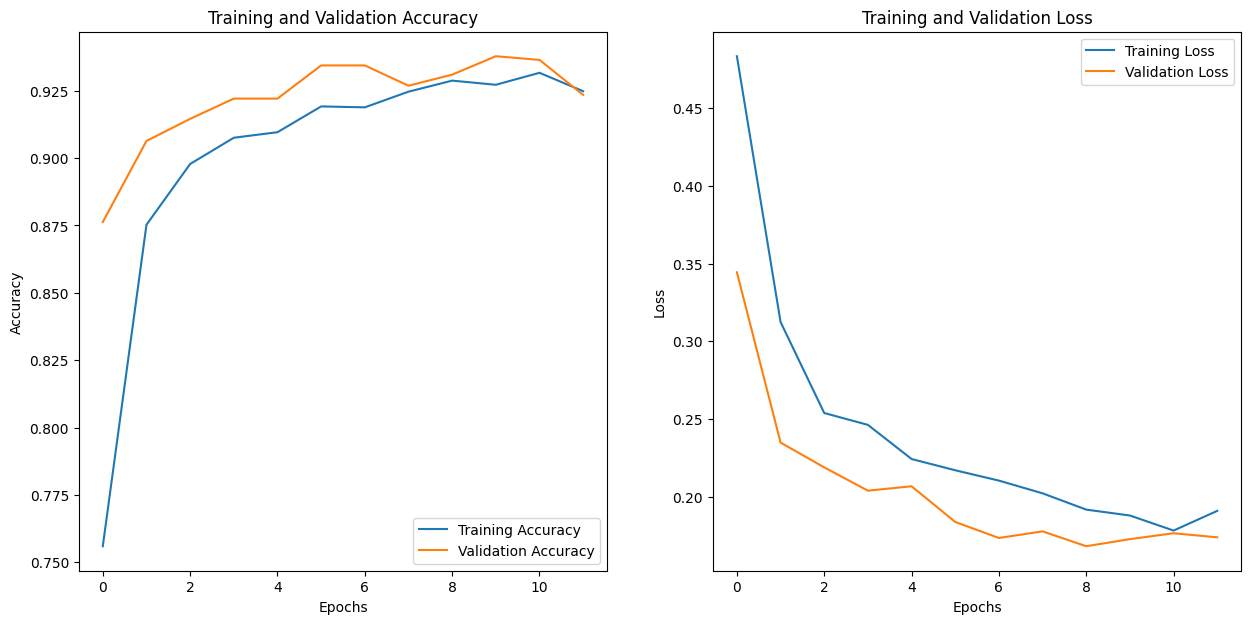

In [ ]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

20/20 [==============================] - 4s 177ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.94      0.94      0.94       234
Pneumonia (Class 1)       0.96      0.96      0.96       386

           accuracy                           0.95       620
          macro avg       0.95      0.95      0.95       620
       weighted avg       0.95      0.95      0.95       620



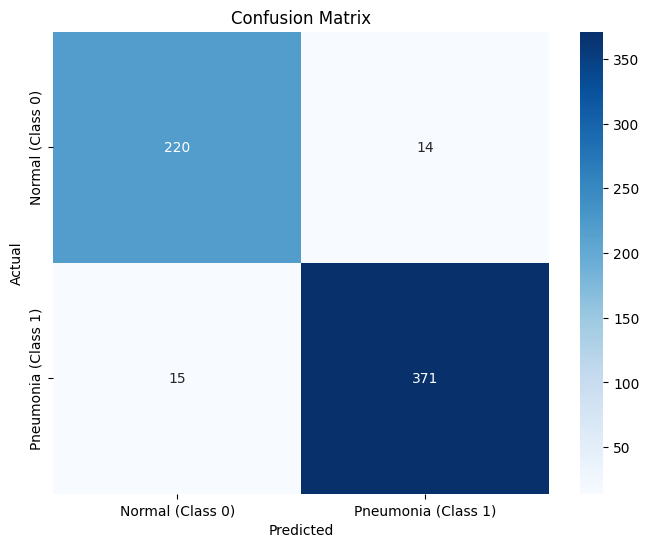

In [ ]:
test_predictions = vmodel.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Final Model

In [28]:
final_model = Sequential()

# Convolutional layers
final_model.add(Conv2D(16, 3, padding="valid", activation="relu", input_shape=(150, 150, 1)))
final_model.add(MaxPooling2D())

final_model.add(Conv2D(32, 3, padding="valid", activation="relu"))
final_model.add(MaxPooling2D())

final_model.add(Conv2D(64, 3, padding="valid", activation="relu"))
final_model.add(MaxPooling2D())

final_model.add(Conv2D(128, 3, padding="valid", activation="relu"))
final_model.add(MaxPooling2D())

final_model.add(Dropout(0.2))
final_model.add(Flatten())

final_model.add(Dense(256, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
final_model.add(Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
final_model.add(Dense(64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
final_model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.HeNormal()))

final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

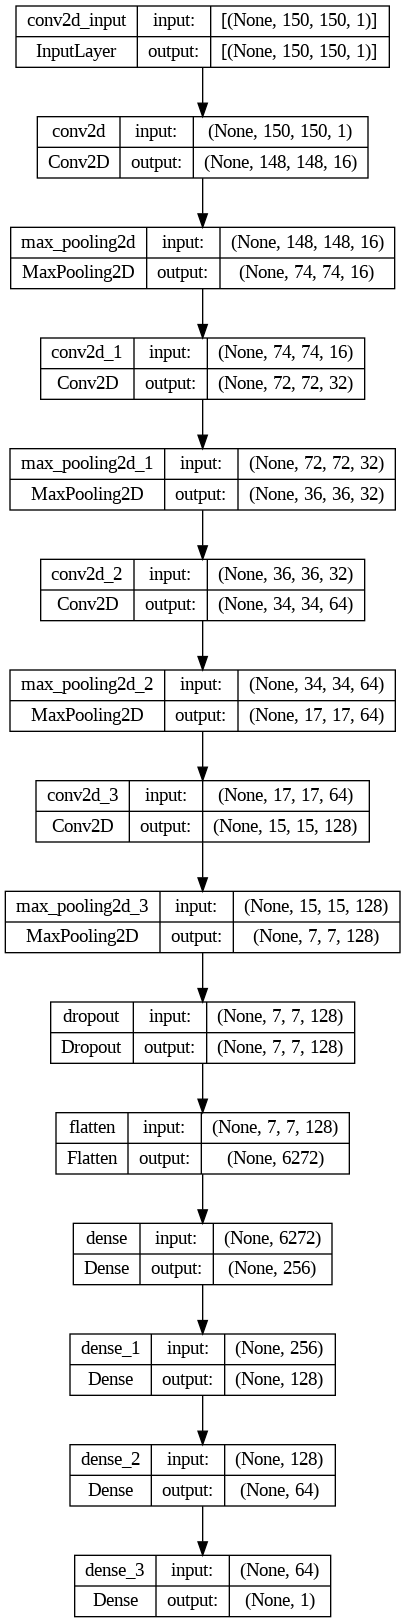

In [29]:
tf.keras.utils.plot_model(final_model, show_shapes= True)

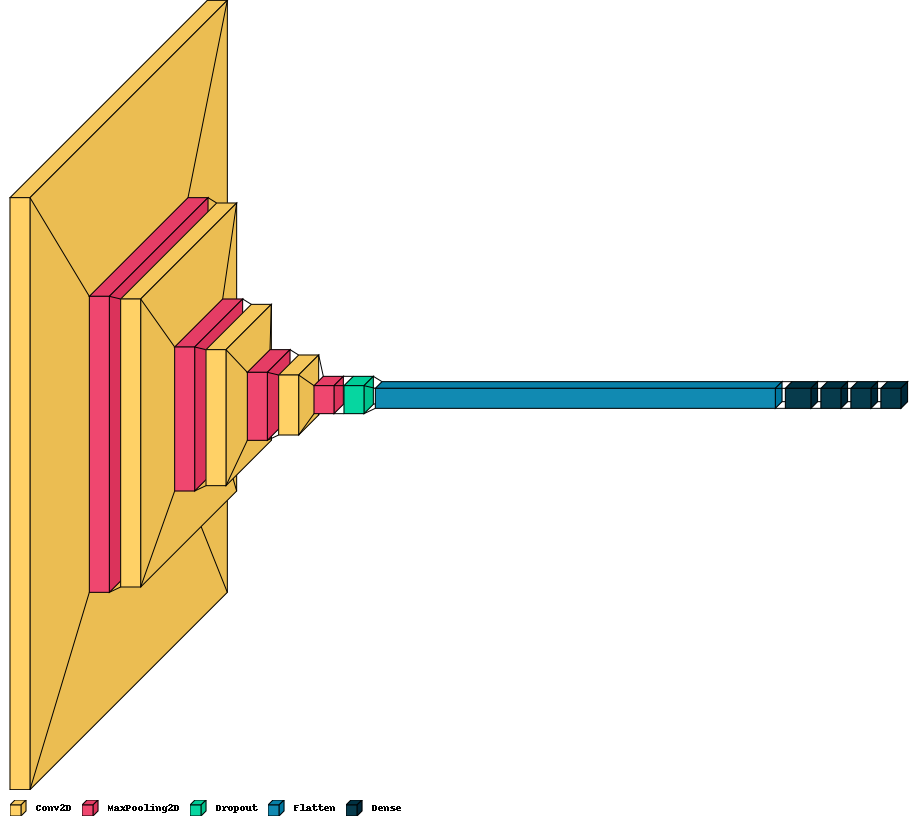

In [30]:
# Create a layered view of the model
visualkeras.layered_view(final_model, legend=True)

In [31]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=final_model.fit(train_datagen.flow(x_train,y_train, batch_size = 32), epochs=100, validation_data = train_datagen.flow(x_val, y_val, batch_size = 32) ,callbacks = callback)

Epoch 1/100
183/183 [==============================] - 173s 926ms/step - loss: 0.4844 - accuracy: 0.7555 - val_loss: 0.2893 - val_accuracy: 0.8770
Epoch 2/100
183/183 [==============================] - 167s 914ms/step - loss: 0.2960 - accuracy: 0.8845 - val_loss: 0.2195 - val_accuracy: 0.9152
Epoch 3/100
183/183 [==============================] - 162s 883ms/step - loss: 0.2510 - accuracy: 0.9031 - val_loss: 0.2182 - val_accuracy: 0.9159
Epoch 4/100
183/183 [==============================] - 163s 890ms/step - loss: 0.2210 - accuracy: 0.9171 - val_loss: 0.2576 - val_accuracy: 0.8968
Epoch 5/100
183/183 [==============================] - 161s 881ms/step - loss: 0.2197 - accuracy: 0.9175 - val_loss: 0.1858 - val_accuracy: 0.9337
Epoch 6/100
183/183 [==============================] - 164s 894ms/step - loss: 0.2087 - accuracy: 0.9222 - val_loss: 0.1960 - val_accuracy: 0.9221
Epoch 7/100
183/183 [==============================] - 156s 854ms/step - loss: 0.1996 - accuracy: 0.9270 - val_loss: 0

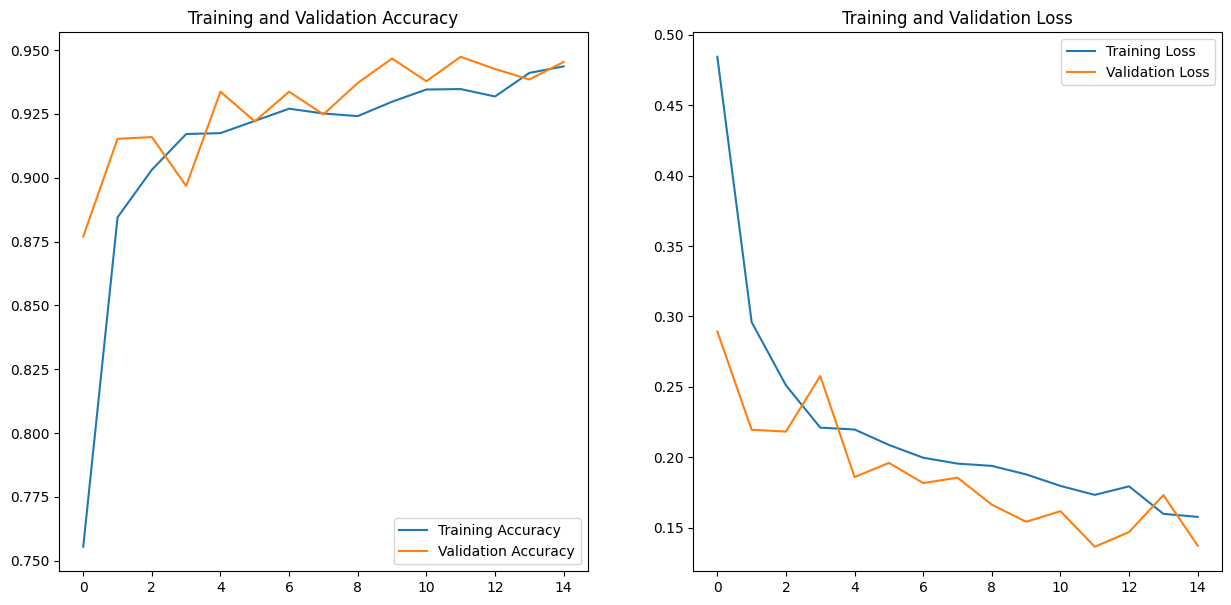

In [32]:
# Extract accuracy and loss values from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Number of epochs

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
test_results = final_model.evaluate(test_datagen.flow(x_test,y_test, batch_size=32))
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])
print('The current model achieved a categorical accuracy of {}%'.format(round(test_results[1]*100,2)))

20/20 [==============================] - 3s 157ms/step - loss: 0.1338 - accuracy: 0.9500
Test Loss: 0.1338038593530655
Test Accuracy: 0.949999988079071
The current model achieved a categorical accuracy of 95.0%


20/20 [==============================] - 5s 266ms/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.96      0.91      0.93       234
Pneumonia (Class 1)       0.94      0.98      0.96       386

           accuracy                           0.95       620
          macro avg       0.95      0.94      0.95       620
       weighted avg       0.95      0.95      0.95       620



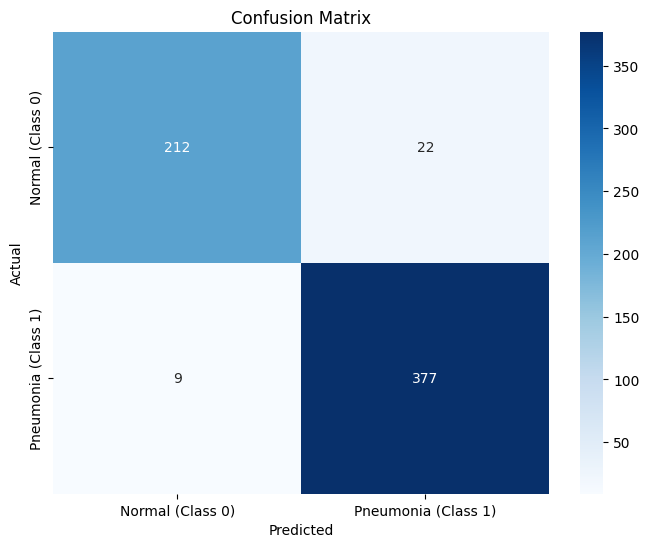

In [34]:
test_predictions = final_model.predict(x_test)
test_predictions = test_predictions.reshape(1,-1)[0]
predictions_binary = (test_predictions > 0.5).astype(int)  # Apply a threshold of 0.5 to get binary labels

print(classification_report(y_test, predictions_binary, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)']))

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predictions_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'], yticklabels=['Normal (Class 0)', 'Pneumonia (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Predictions

In [35]:
# The Next step is to save the model. This is our trained model.
# We saved it so that we do not need to train it again and again.

# I am saving this in the .h5 format.
final_model.save("./xray_model.h5")

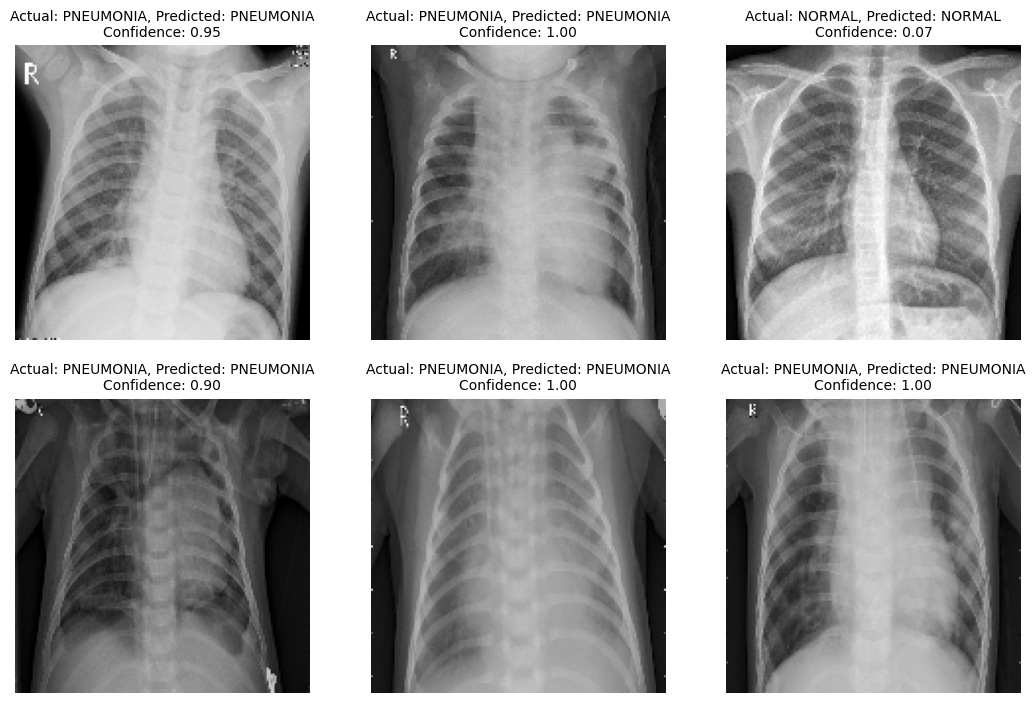

In [36]:
plt.figure(figsize=(13, 13))  # Adjust the figure size

sample_indices = random.sample(range(len(x_test)), 6)  # Randomly select 6 indices

for i, index in enumerate(sample_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[index], cmap="gray")  # Assuming your test images are stored in x_test
    actual_class = class_names[y_test[index]]  # Access the actual label using y_test
    predicted_class = class_names[predictions_binary[index]]  # Access the predicted label using predictions_binary
    confidence = test_predictions[index]  # Get the confidence value from test_predictions
    title = f"Actual: {actual_class}, Predicted: {predicted_class}\nConfidence: {confidence:.2f}"
    ax.set_title(title, fontsize=10)  # Adjust the font size for the title
    plt.axis("off")

plt.show()

1/1 [==============================] - 0s 266ms/step


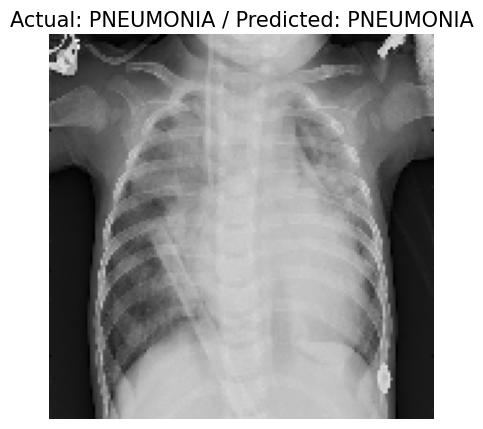

In [38]:
# Loading the .h5 model that we had saved in the previous step:
my_xray_cnnmodel = keras.models.load_model("./xray_model.h5")

# Define an image path from the "pred" folder:
image_path = '/content/drive/MyDrive/Pneumonia_Chest_Xray/pred/PNEUMONIA/PNEUMONIA_3.jpeg'

# Preprocessing the image to 150x150x1 size (grayscale) and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150), color_mode="grayscale")
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'PNEUMONIA']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

# Use a threshold of 0.5 to classify
if predictions > 0.5:
    pred = 'PNEUMONIA'
else:
    pred = 'NORMAL'

# Finally, display the predicted outcome with both actual and predicted values:
plt.figure(figsize=[8, 5])
plt.imshow(image, cmap='gray')
title = "Actual: " + actual + " / Predicted: " + pred
plt.title(title, size=15)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 286ms/step


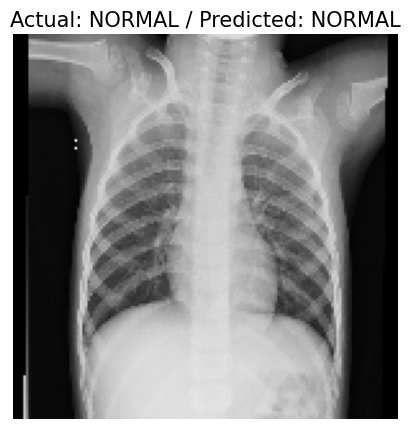

In [39]:
# Define an image path from the "pred" folder:
image_path = '/content/drive/MyDrive/Pneumonia_Chest_Xray/pred/NORMAL/NORMAL_4.jpeg'

# Preprocessing the image to 150x150x1 size (grayscale) and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150), color_mode="grayscale")
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'PNEUMONIA']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

# Use a threshold of 0.5 to classify
if predictions > 0.5:
    pred = 'PNEUMONIA'
else:
    pred = 'NORMAL'

# Finally, display the predicted outcome with both actual and predicted values:
plt.figure(figsize=[8, 5])
plt.imshow(image, cmap='gray')
title = "Actual: " + actual + " / Predicted: " + pred
plt.title(title, size=15)
plt.axis('off')
plt.show()